In [442]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [443]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [444]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15,10),'figure.dpi':200})

In [445]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

In [446]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [447]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [448]:
#importing dataset

df=pd.read_csv('penguins_lter.csv')

In [449]:
df.head()

studyName  Sample Number                              Species  Region  \
0  PAL0708   1              Adelie Penguin (Pygoscelis adeliae)  Anvers   
1  PAL0708   2              Adelie Penguin (Pygoscelis adeliae)  Anvers   
2  PAL0708   3              Adelie Penguin (Pygoscelis adeliae)  Anvers   
3  PAL0708   4              Adelie Penguin (Pygoscelis adeliae)  Anvers   
4  PAL0708   5              Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage  N1A1          Yes               11/11/07   
1  Torgersen  Adult, 1 Egg Stage  N1A2          Yes               11/11/07   
2  Torgersen  Adult, 1 Egg Stage  N2A1          Yes               11/16/07   
3  Torgersen  Adult, 1 Egg Stage  N2A2          Yes               11/16/07   
4  Torgersen  Adult, 1 Egg Stage  N3A1          Yes               11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0  39.1                18.7               181.0                3750.0          
1  39.5                17.4               186.0                3800.0          
2  40.3                18.0               195.0                3250.0          
3 NaN                 NaN                NaN                  NaN              
4  36.7                19.3               193.0                3450.0          

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0  MALE   NaN                NaN                  
1  FEMALE  8.94956           -24.69454            
2  FEMALE  8.36821           -25.33302            
3  NaN    NaN                NaN                  
4  FEMALE  8.76651           -25.32426            

                         Comments  
0  Not enough blood for isotopes.  
1  NaN                             
2  NaN                             
3  Adult not sampled.              
4  NaN

In [450]:
df.shape

(344, 17)

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

# Below columns of this dataset do not provide useful insights for the analysis, so we can drop these columns to avoid the complexity of the dataset :-

1- studyName
2- Sample Number
3- Region
5- Stage
6- Individual ID
7- Clutch Completion
8- Date Egg
9- Delta 15 N (o/oo)
10-Delta 13 C (o/oo)
11-Comments

In [452]:
df.drop(columns=['studyName','Sample Number','Region','Stage','Individual ID','Clutch Completion','Date Egg','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Comments'],inplace=True)

In [453]:
# Now final dataset is:
df.head()

Species     Island  Culmen Length (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen  39.1                 
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen  39.5                 
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen  40.3                 
3  Adelie Penguin (Pygoscelis adeliae)  Torgersen NaN                   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen  36.7                 

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  
0  18.7               181.0                3750.0         MALE    
1  17.4               186.0                3800.0         FEMALE  
2  18.0               195.0                3250.0         FEMALE  
3 NaN                NaN                  NaN             NaN     
4  19.3               193.0                3450.0         FEMALE

In [454]:
df.isnull().sum()

Species                0 
Island                 0 
Culmen Length (mm)     2 
Culmen Depth (mm)      2 
Flipper Length (mm)    2 
Body Mass (g)          2 
Sex                    10
dtype: int64

# Now, Outlier Detection

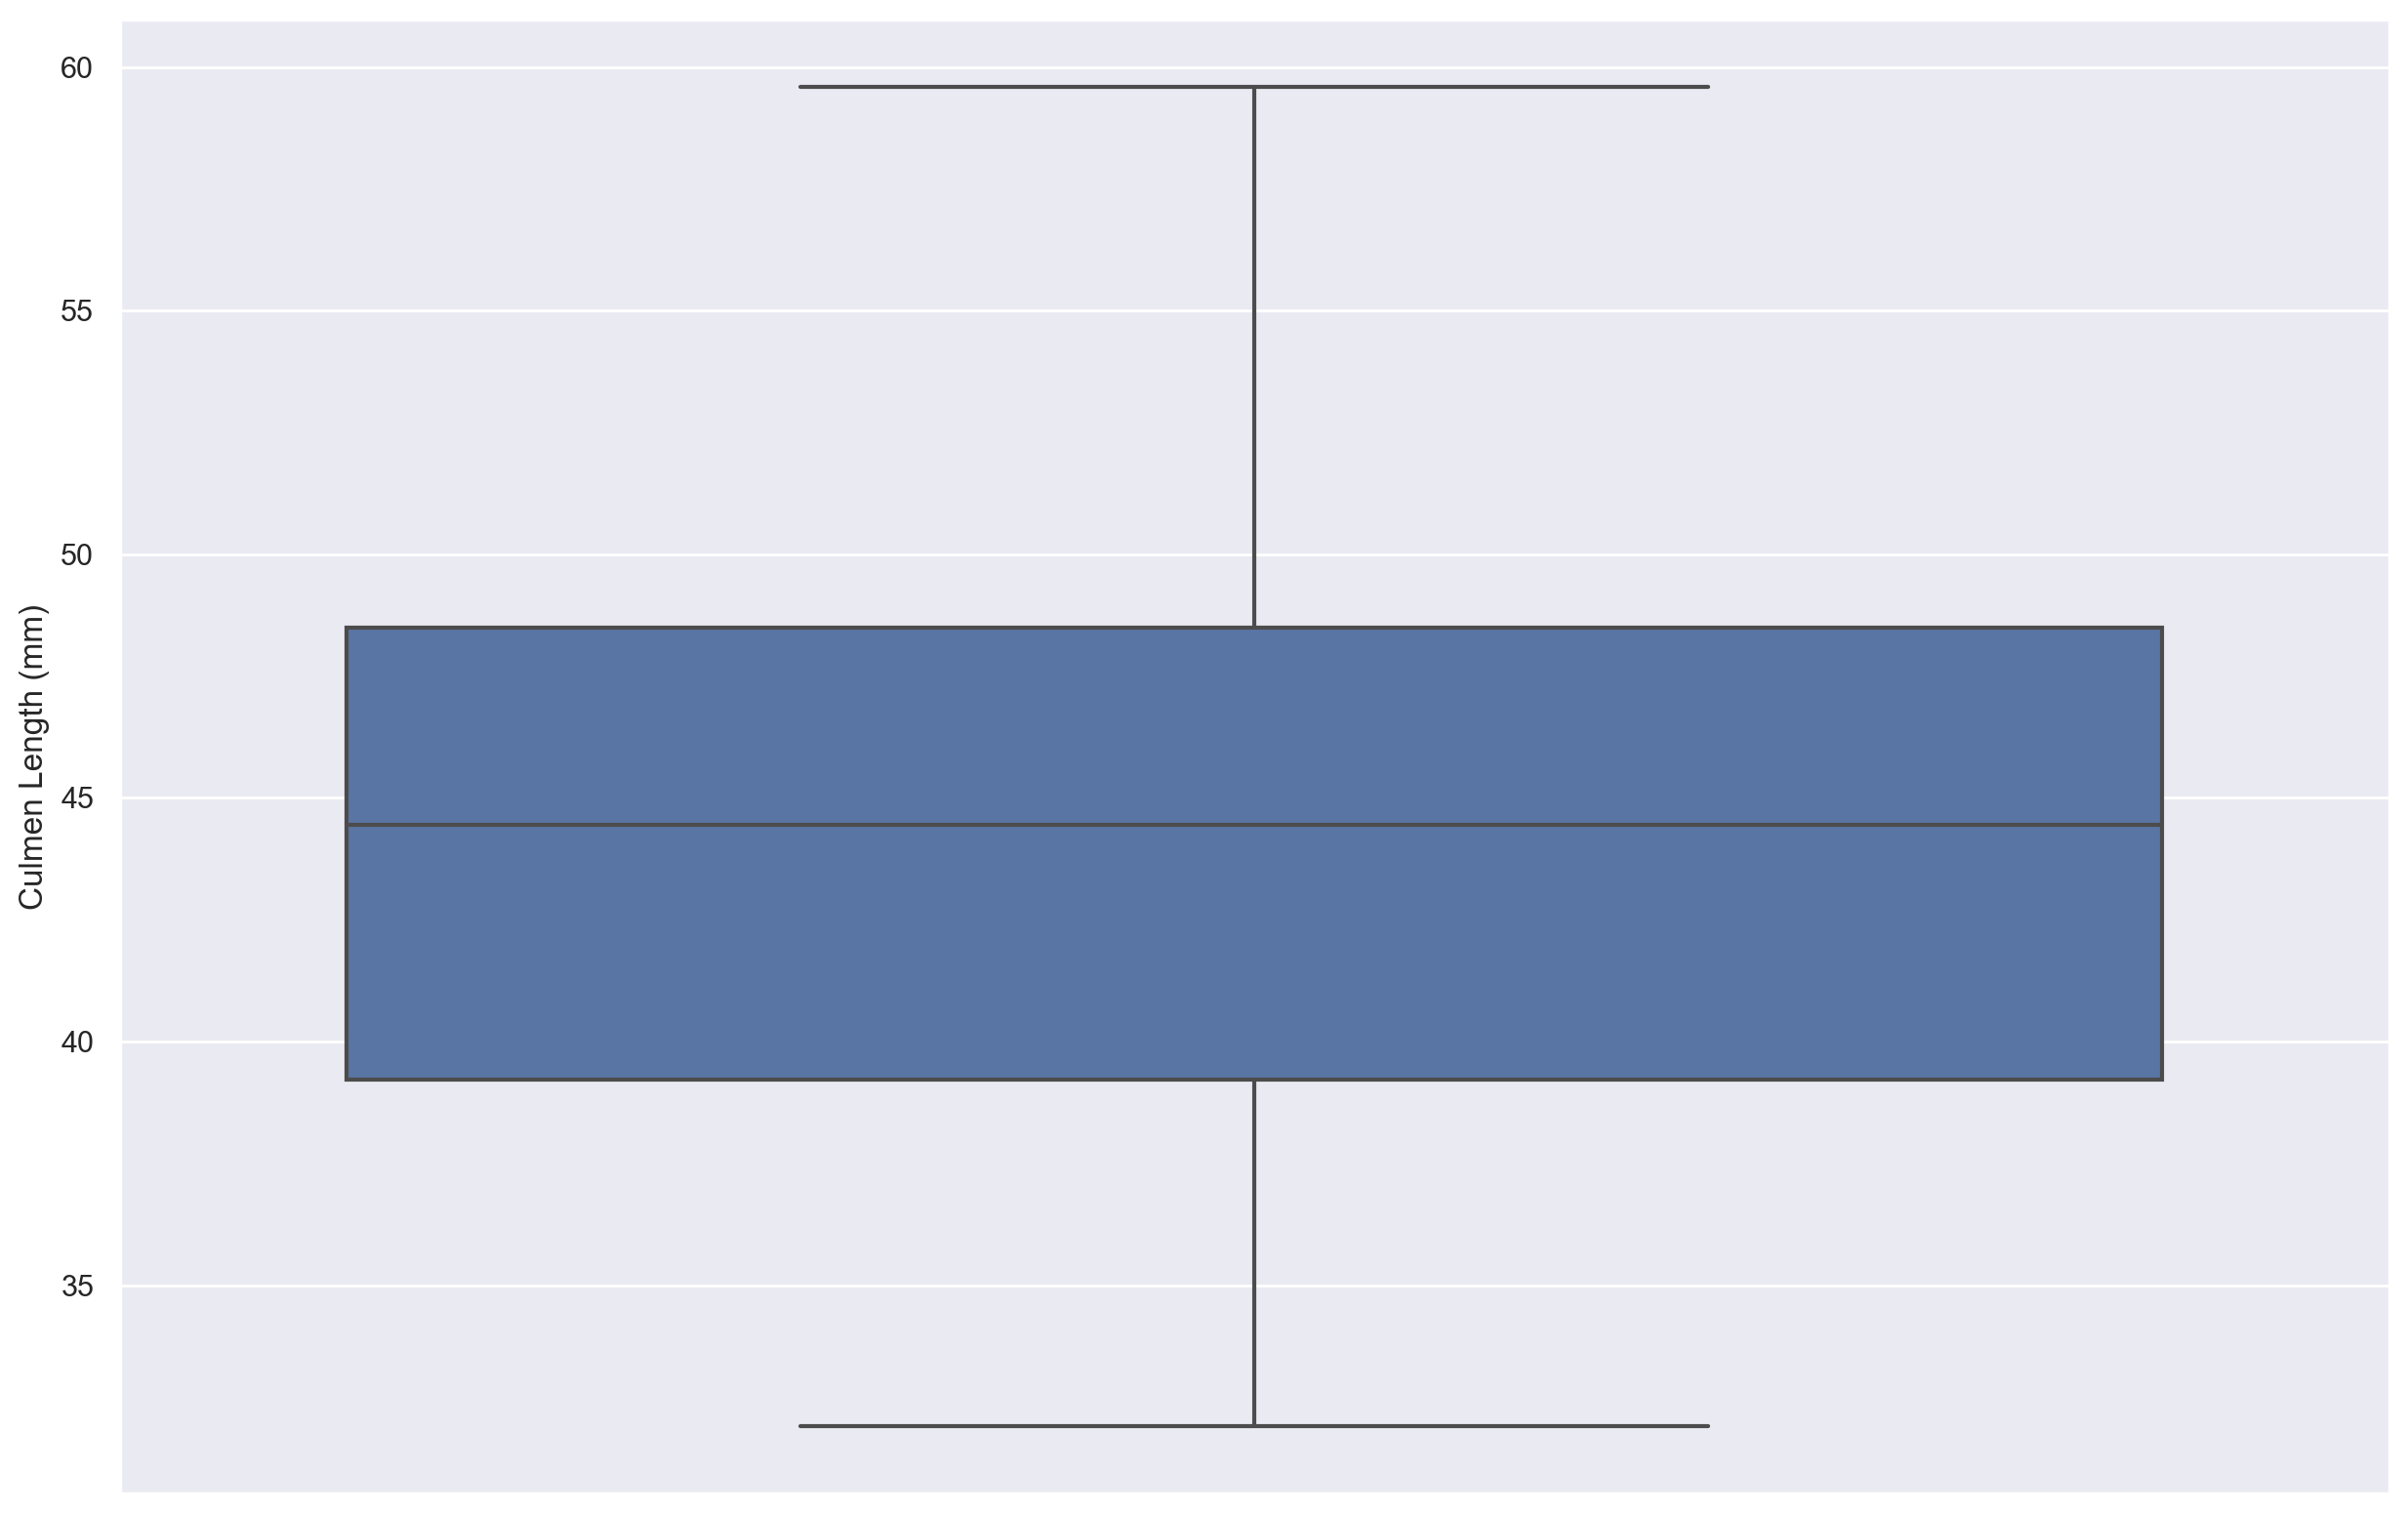

In [455]:
sns.boxplot(y=df['Culmen Length (mm)'])

plt.show()

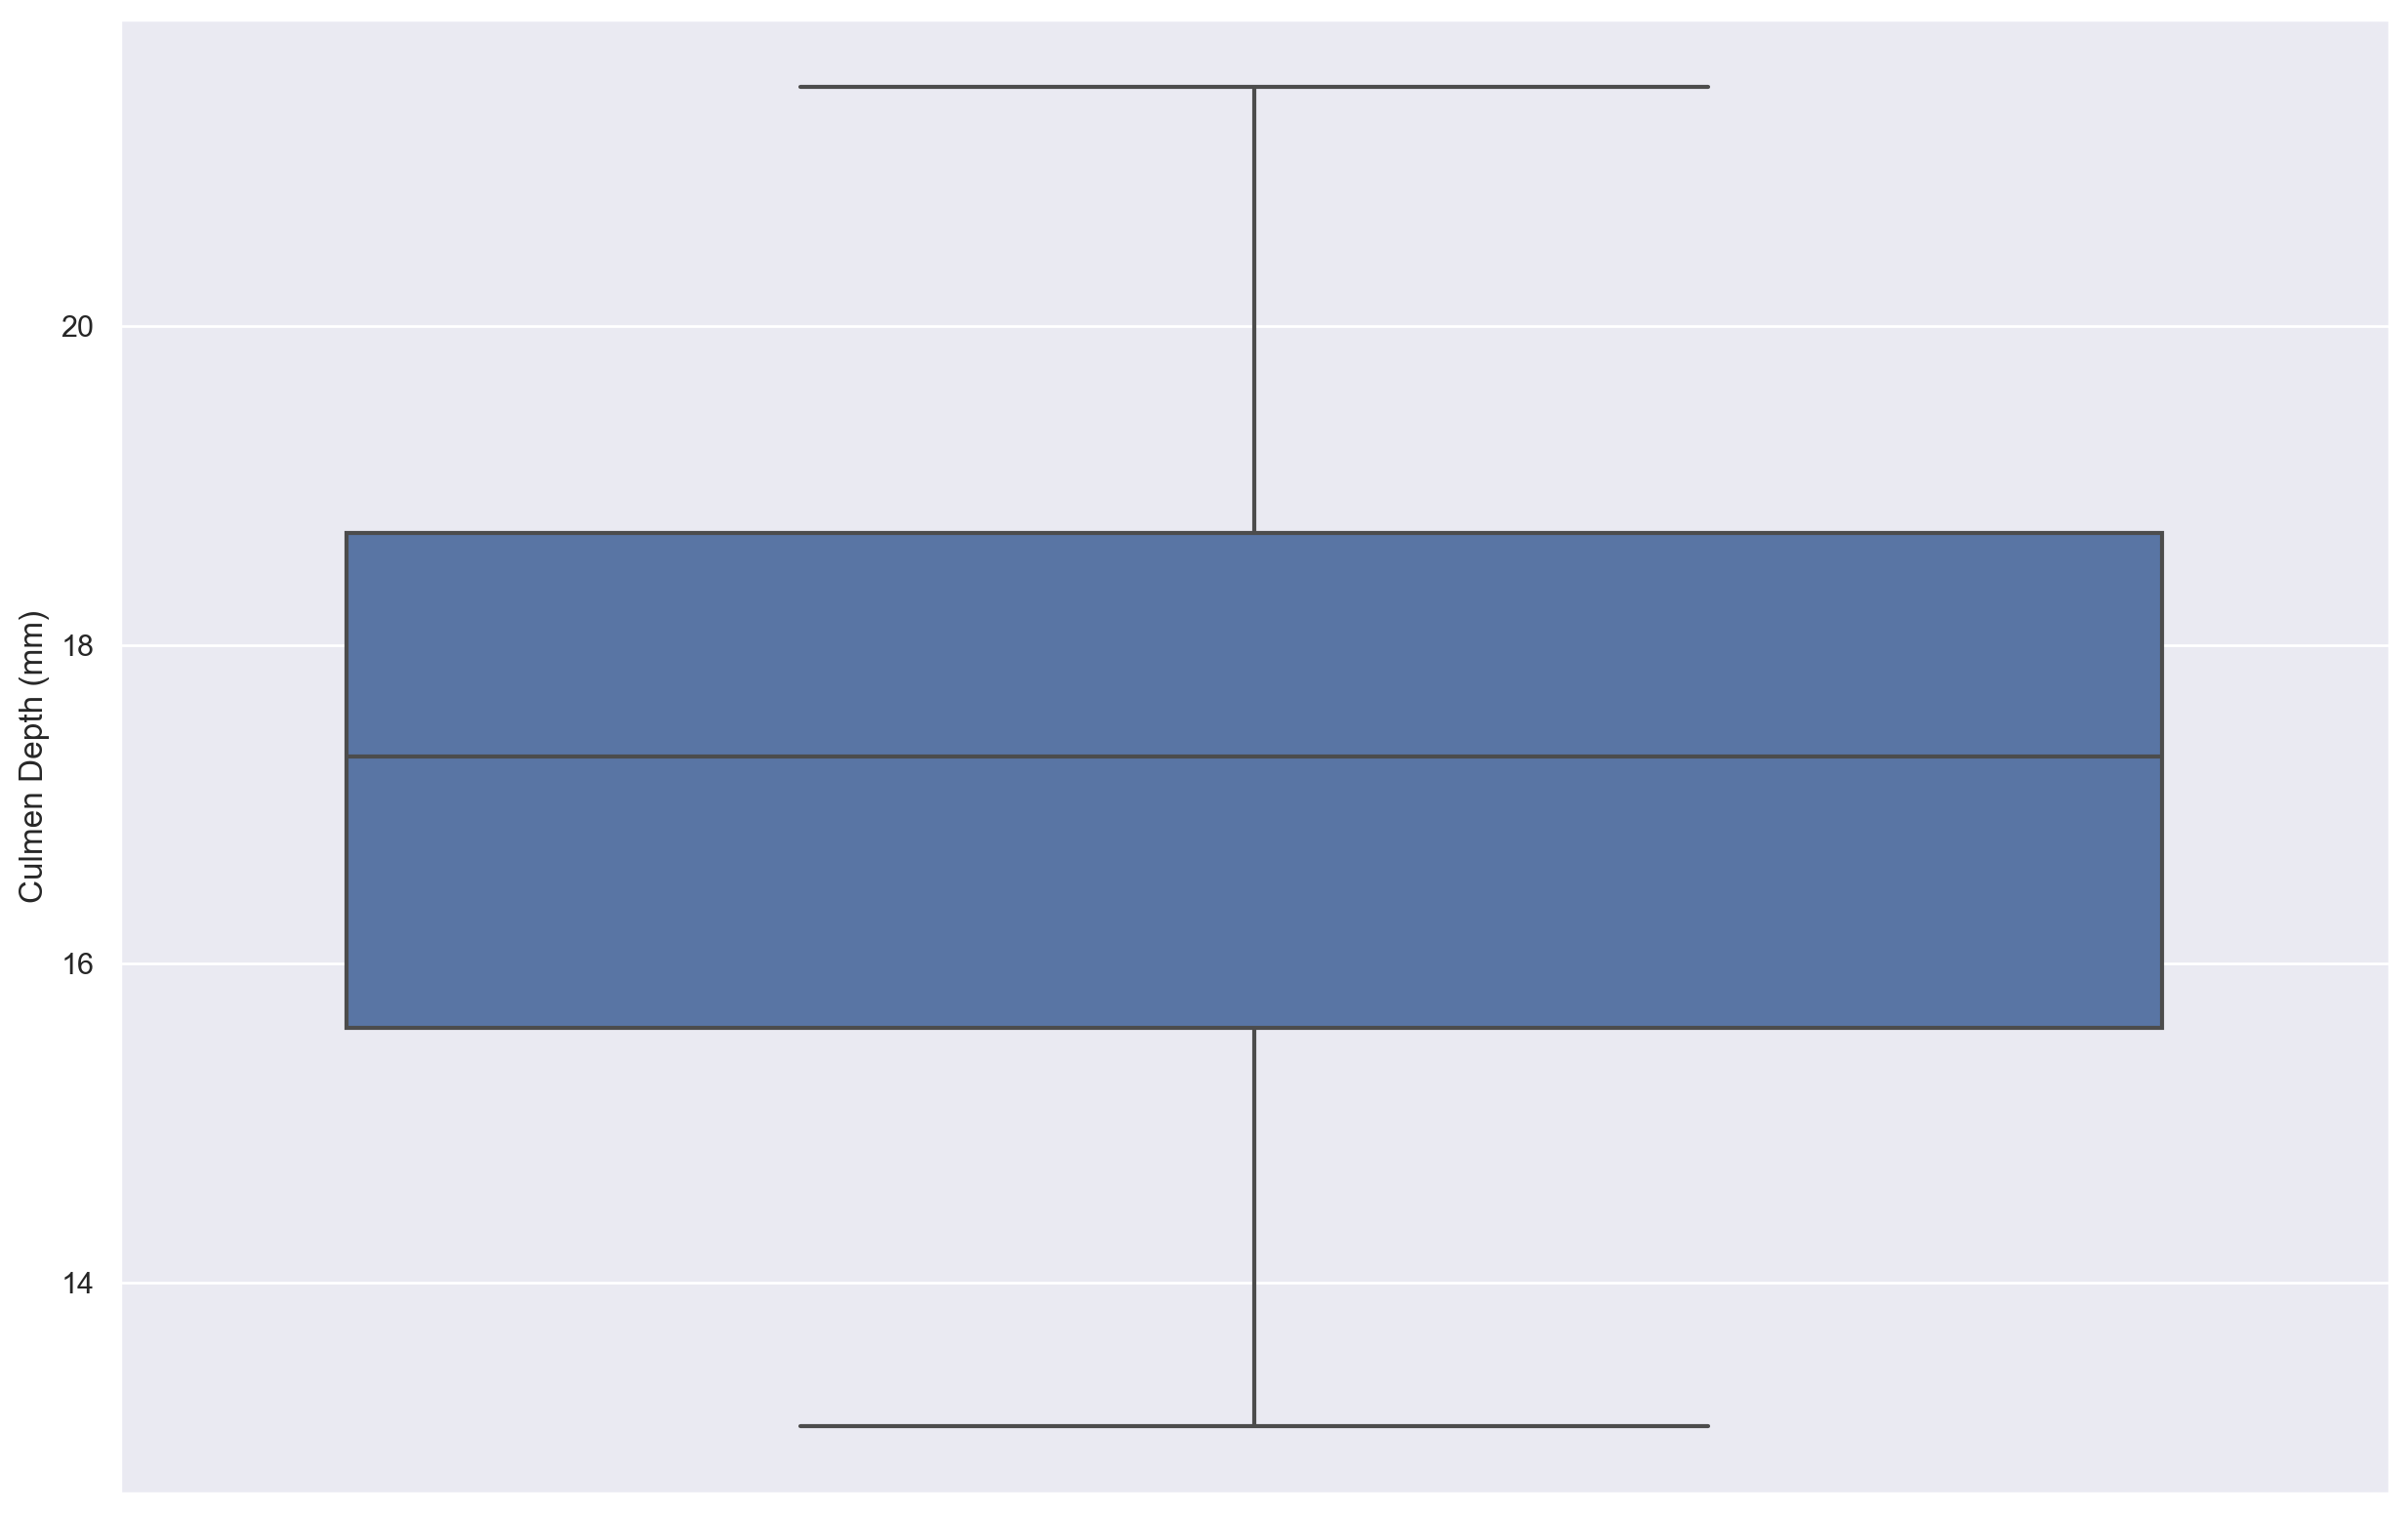

In [456]:
sns.boxplot(y=df['Culmen Depth (mm)'])
plt.show()

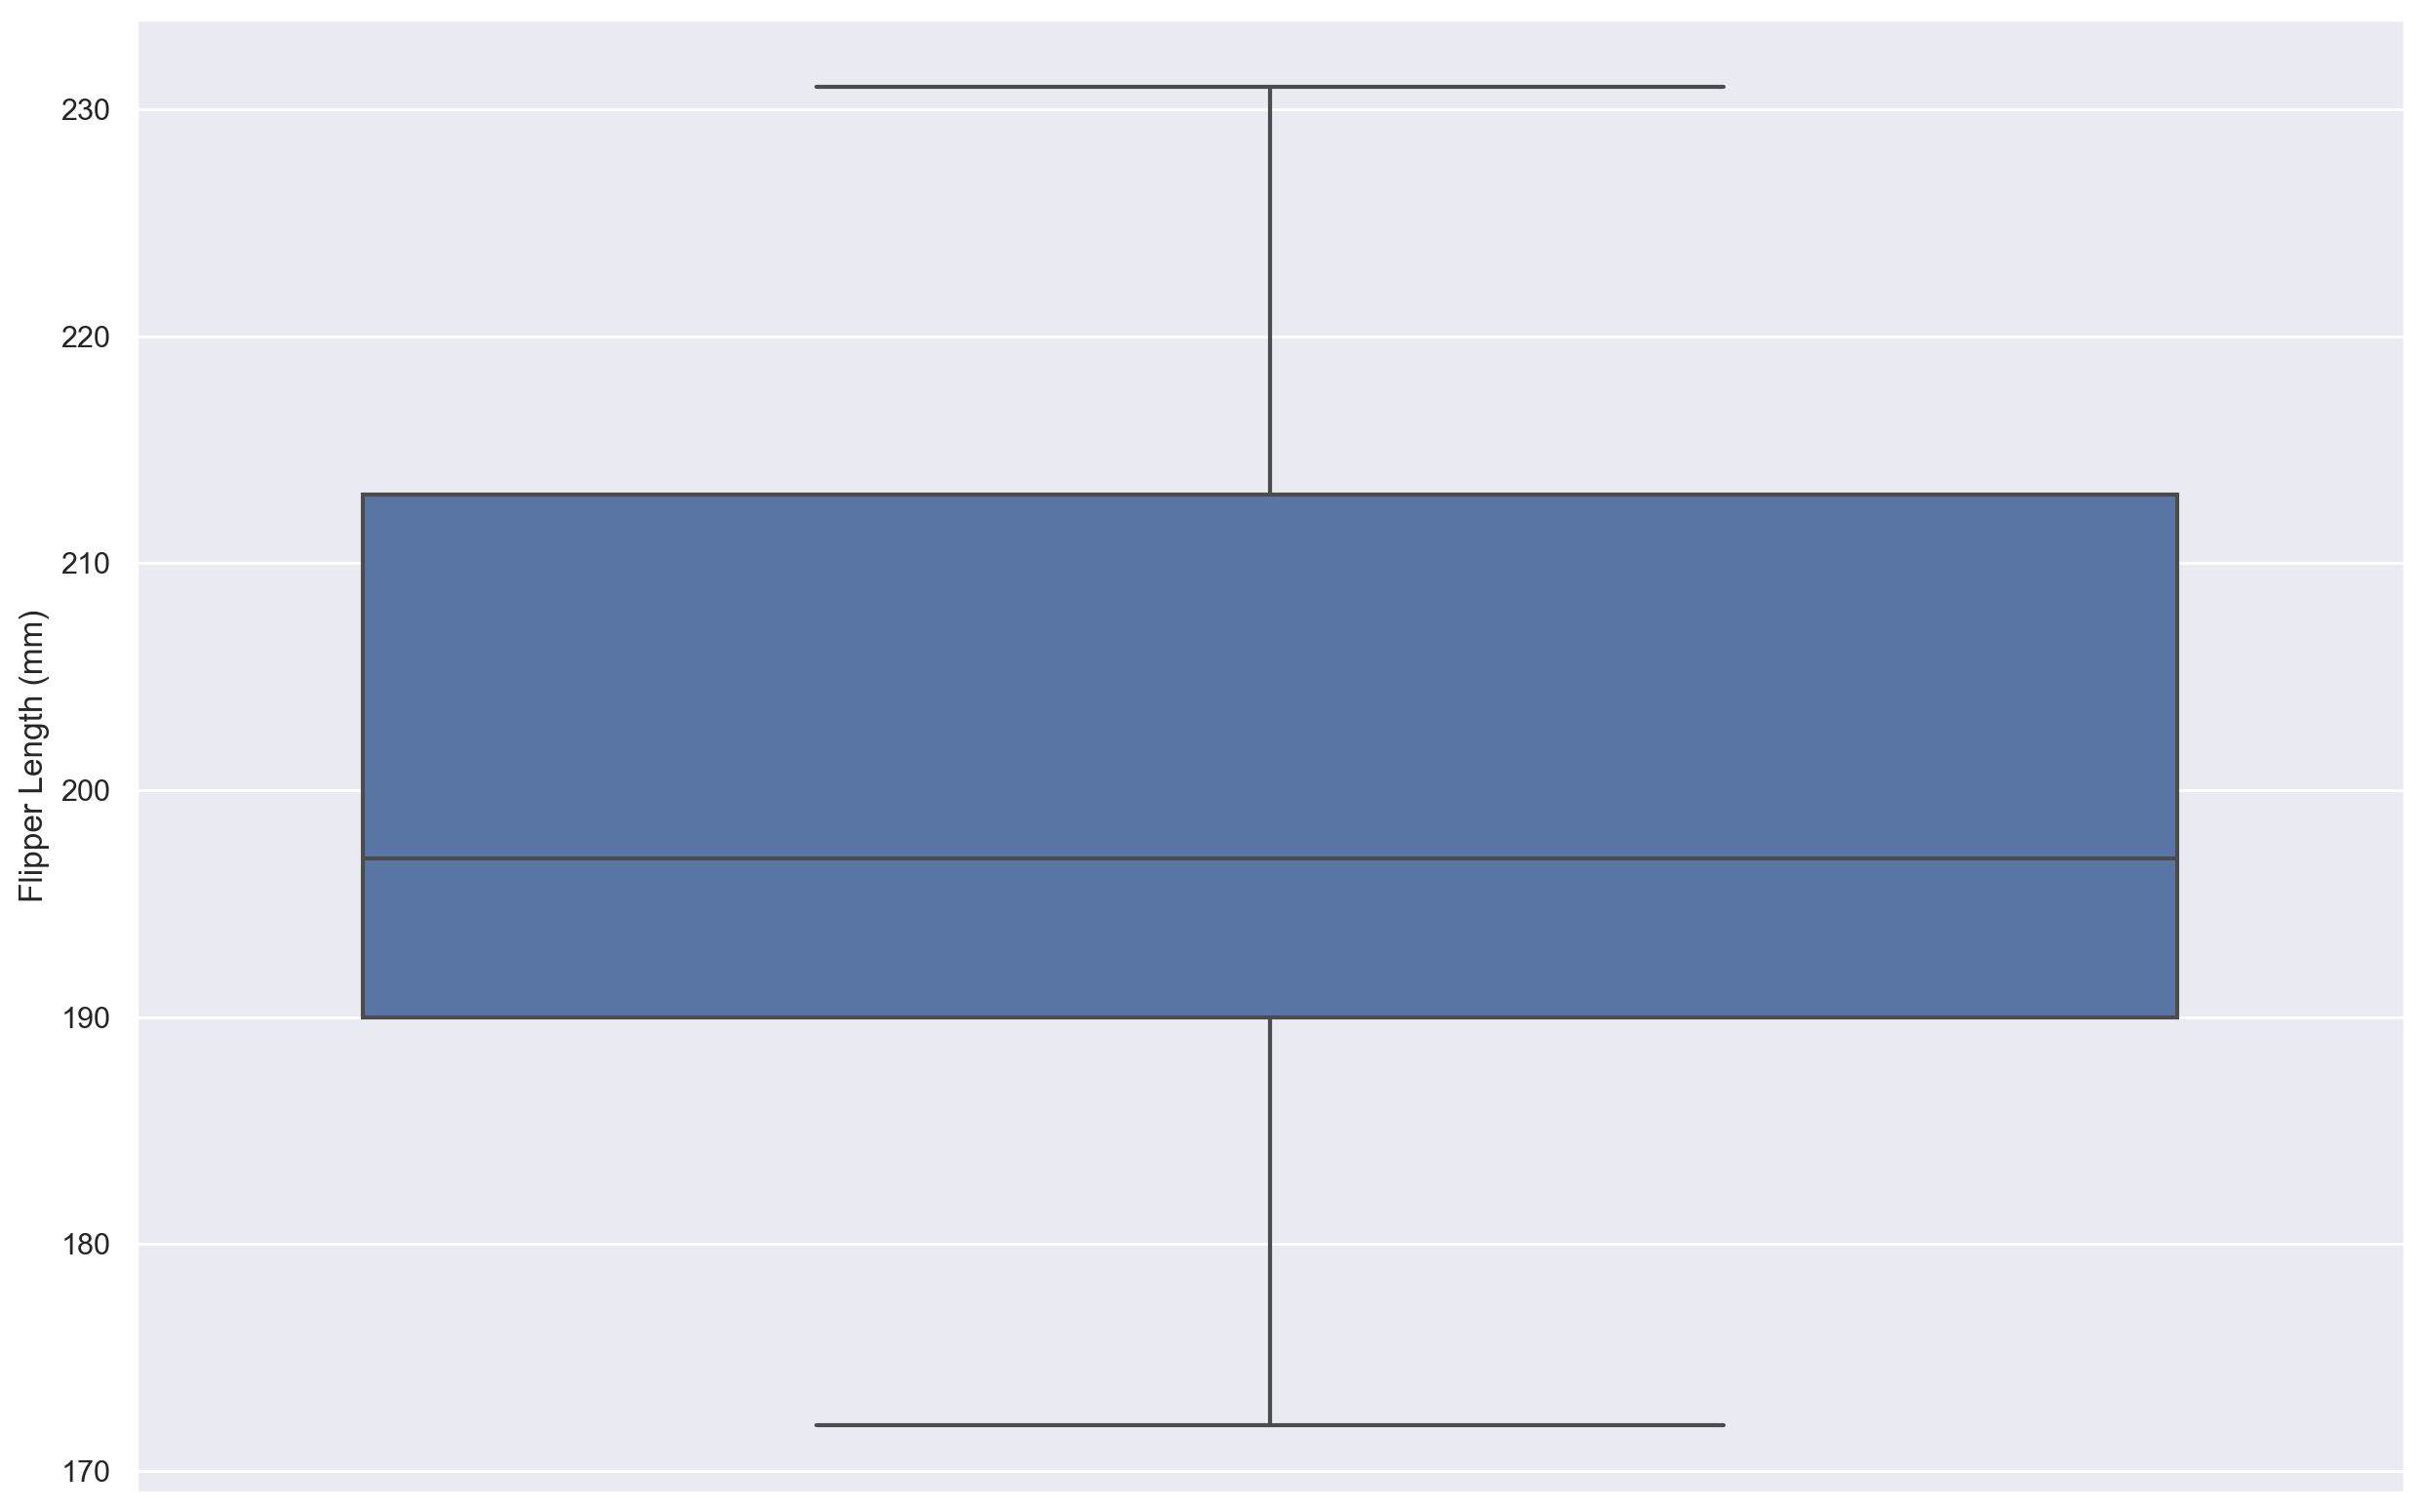

In [457]:
sns.boxplot(y=df['Flipper Length (mm)'])
plt.show()

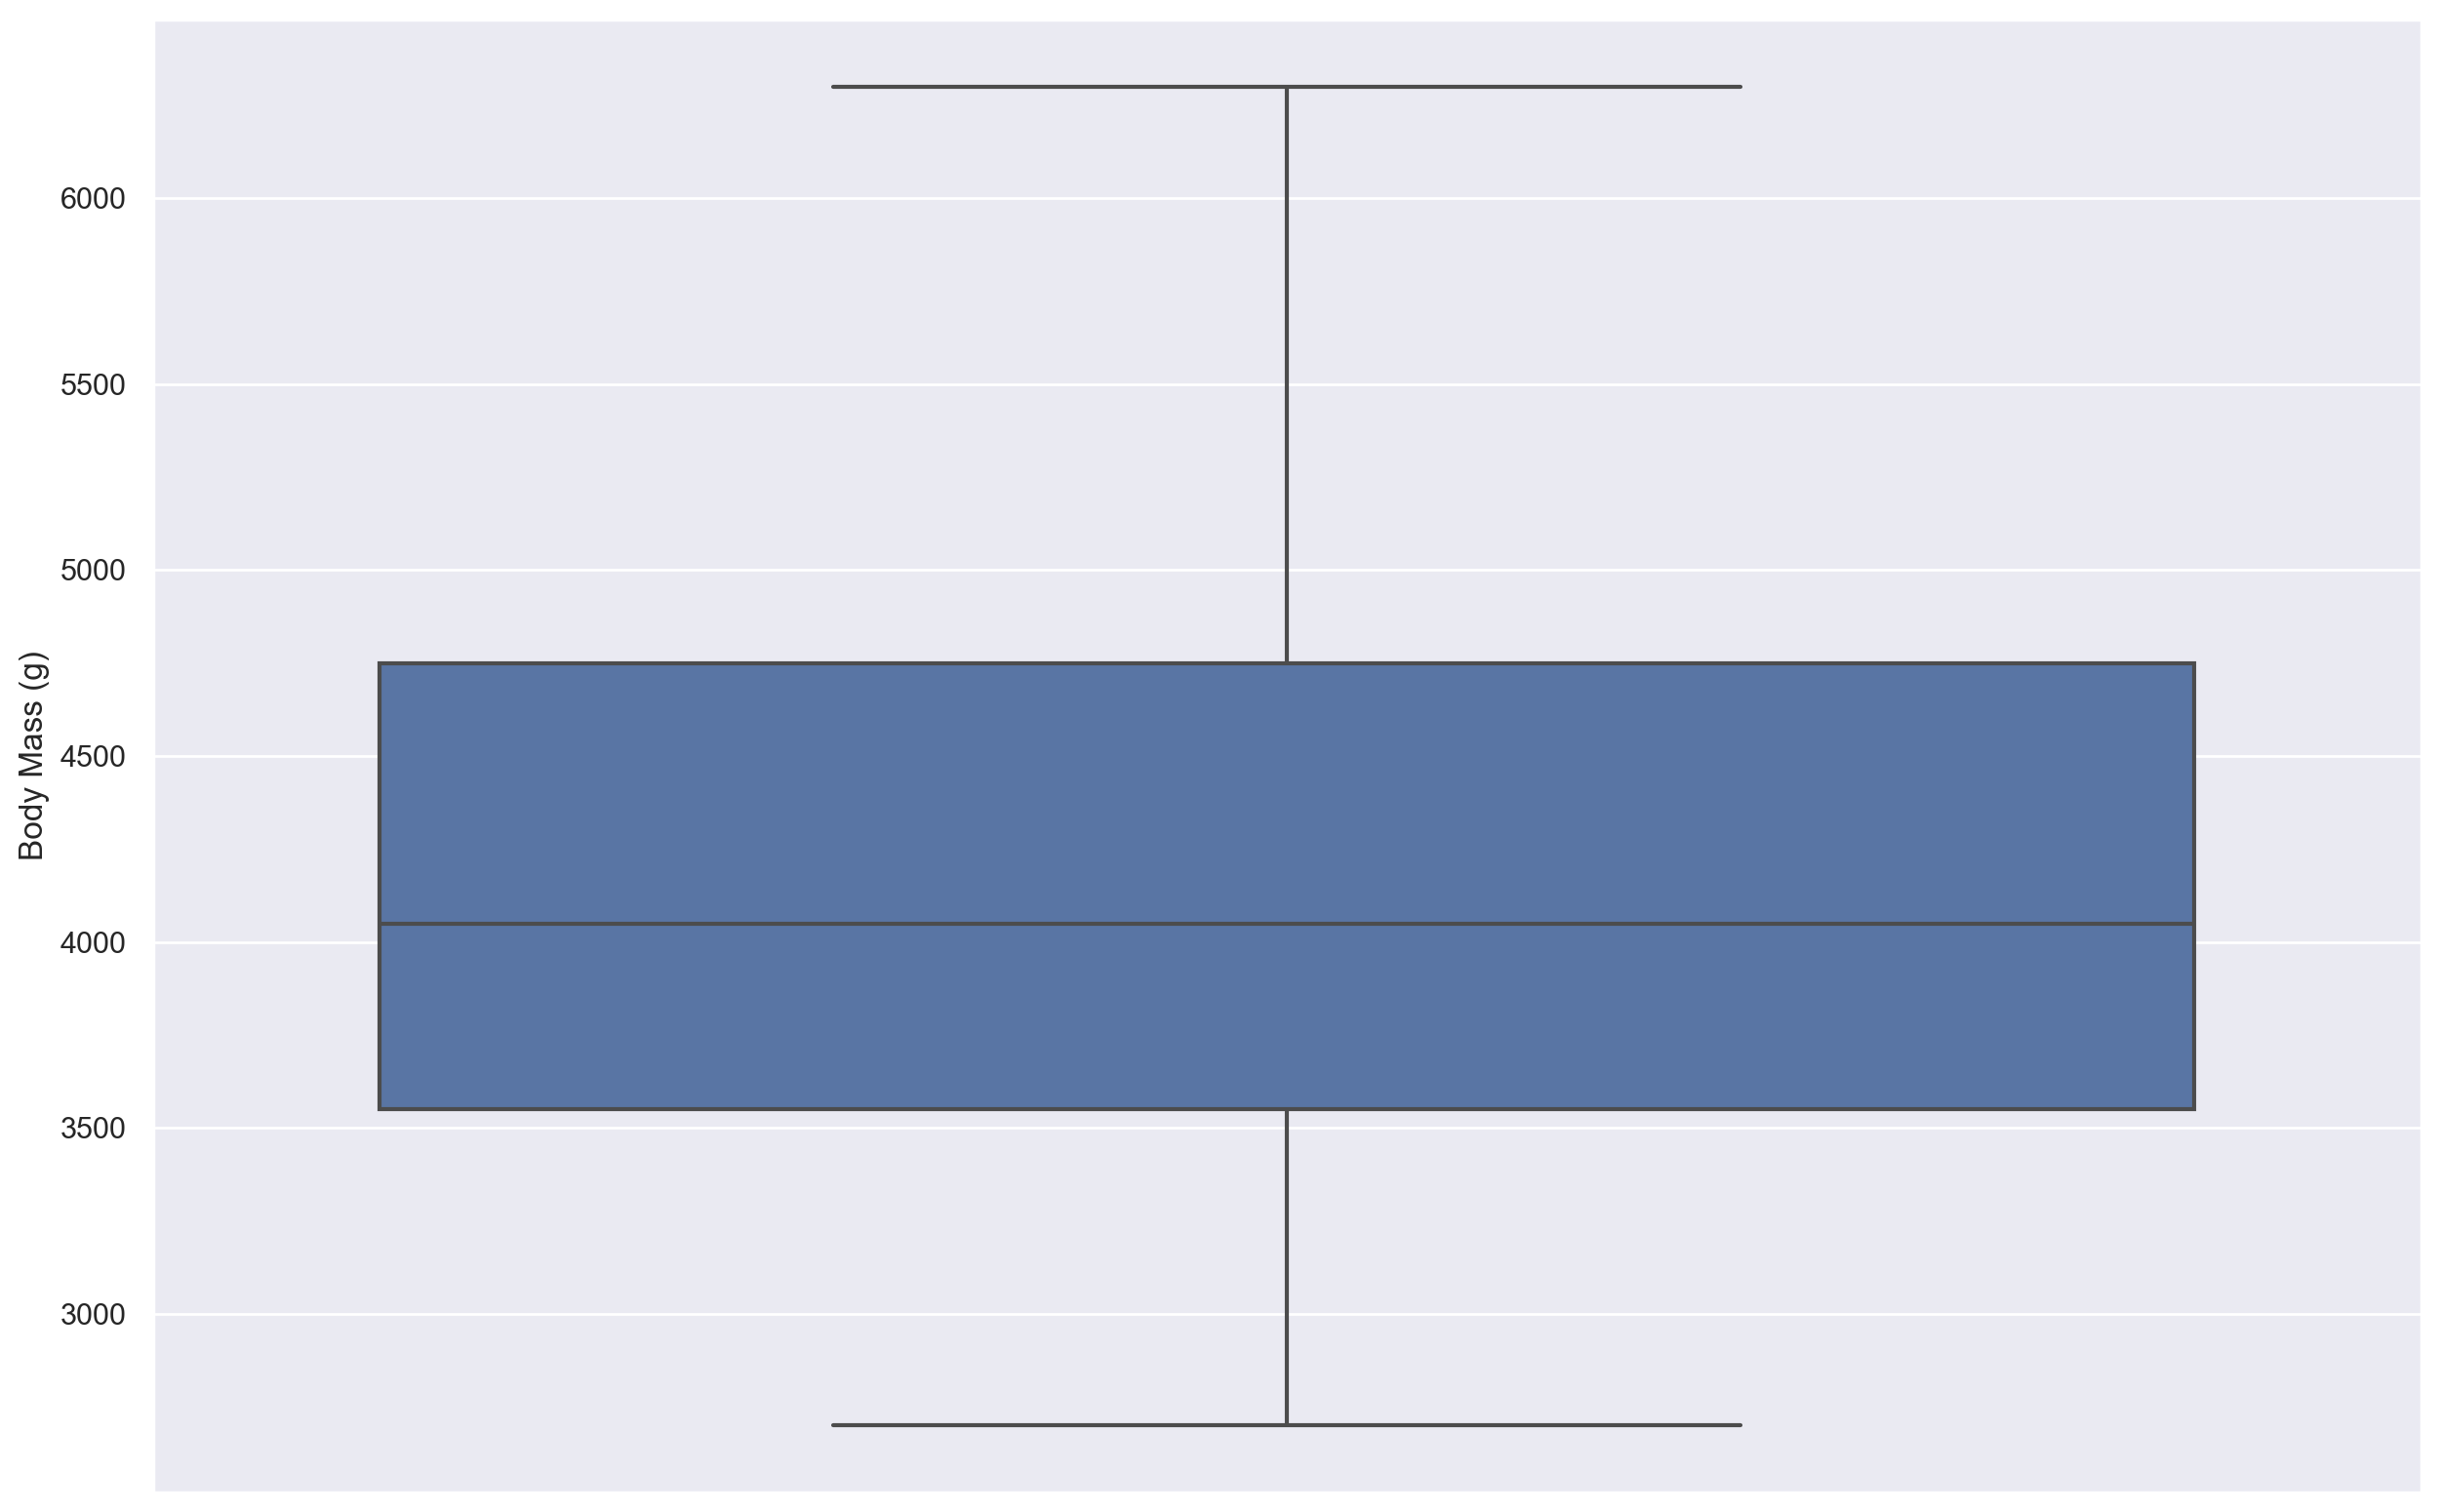

In [458]:
sns.boxplot(y=df['Body Mass (g)'])
plt.show()

# By using Boxplot, no Outliers detected in above 4 columns. So replacing missing values with the mean of their individual cloumns.

In [459]:
df.describe()

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count  342.000000          342.000000         342.000000            
mean   43.921930           17.151170          200.915205            
std    5.459584            1.974793           14.061714             
min    32.100000           13.100000          172.000000            
25%    39.225000           15.600000          190.000000            
50%    44.450000           17.300000          197.000000            
75%    48.500000           18.700000          213.000000            
max    59.600000           21.500000          231.000000            

       Body Mass (g)  
count  342.000000     
mean   4201.754386    
std    801.954536     
min    2700.000000    
25%    3550.000000    
50%    4050.000000    
75%    4750.000000    
max    6300.000000

In [460]:
df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean(),inplace=True)

In [461]:
df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean(),inplace=True)

In [462]:
df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean(),inplace=True)

In [463]:
df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean(),inplace=True)

In [464]:
df.isnull().sum()

Species                0 
Island                 0 
Culmen Length (mm)     0 
Culmen Depth (mm)      0 
Flipper Length (mm)    0 
Body Mass (g)          0 
Sex                    10
dtype: int64

In [465]:
df['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

# For categorical features, we use mode.

In [466]:
df['Sex'].mode()

0    MALE
Name: Sex, dtype: object

In [467]:
df['Sex'].fillna(df['Sex'].mode()[0],inplace=True)

In [468]:
df['Sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [469]:
df[df['Sex']=='.']

Species  Island  Culmen Length (mm)  \
336  Gentoo penguin (Pygoscelis papua)  Biscoe  44.5                 

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g) Sex  
336  15.7               217.0                4875.0         .

In [470]:
df.at[336,'Sex']='MALE'

In [471]:
df['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [472]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# EDA

In [474]:
cnt_s=df['Species'].value_counts()
cnt_s

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)    68 
Name: Species, dtype: int64

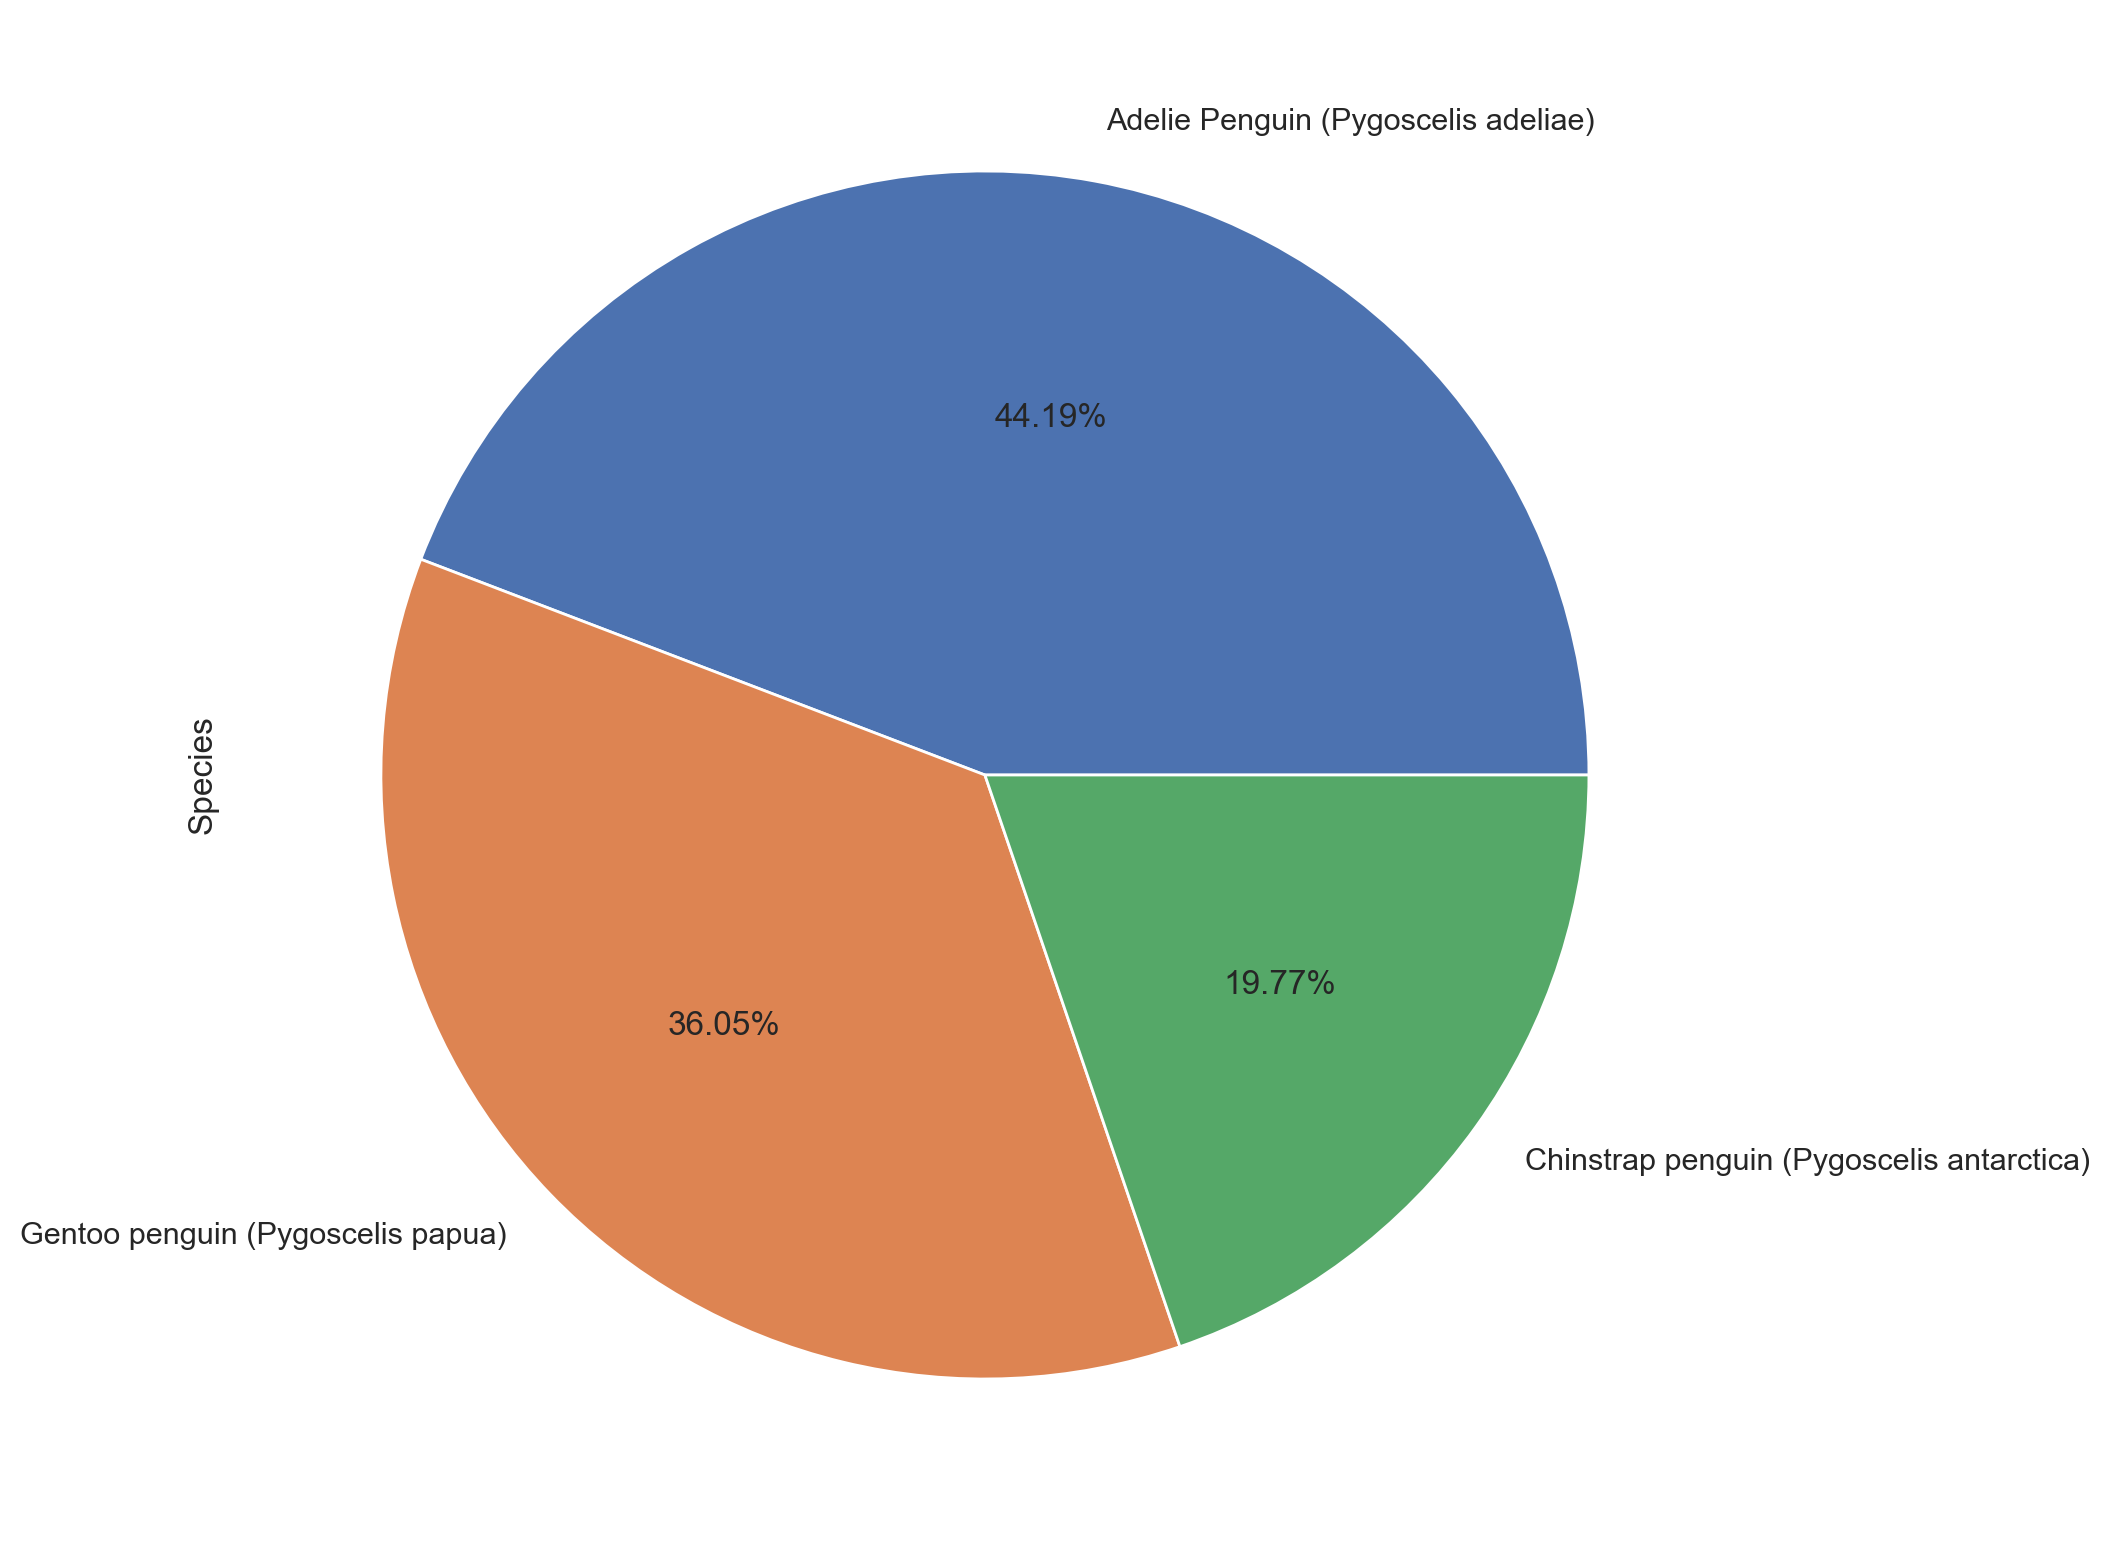

In [475]:
cnt_s.plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [476]:
cnt_i=df['Island'].value_counts()
cnt_i

Biscoe       168
Dream        124
Torgersen    52 
Name: Island, dtype: int64

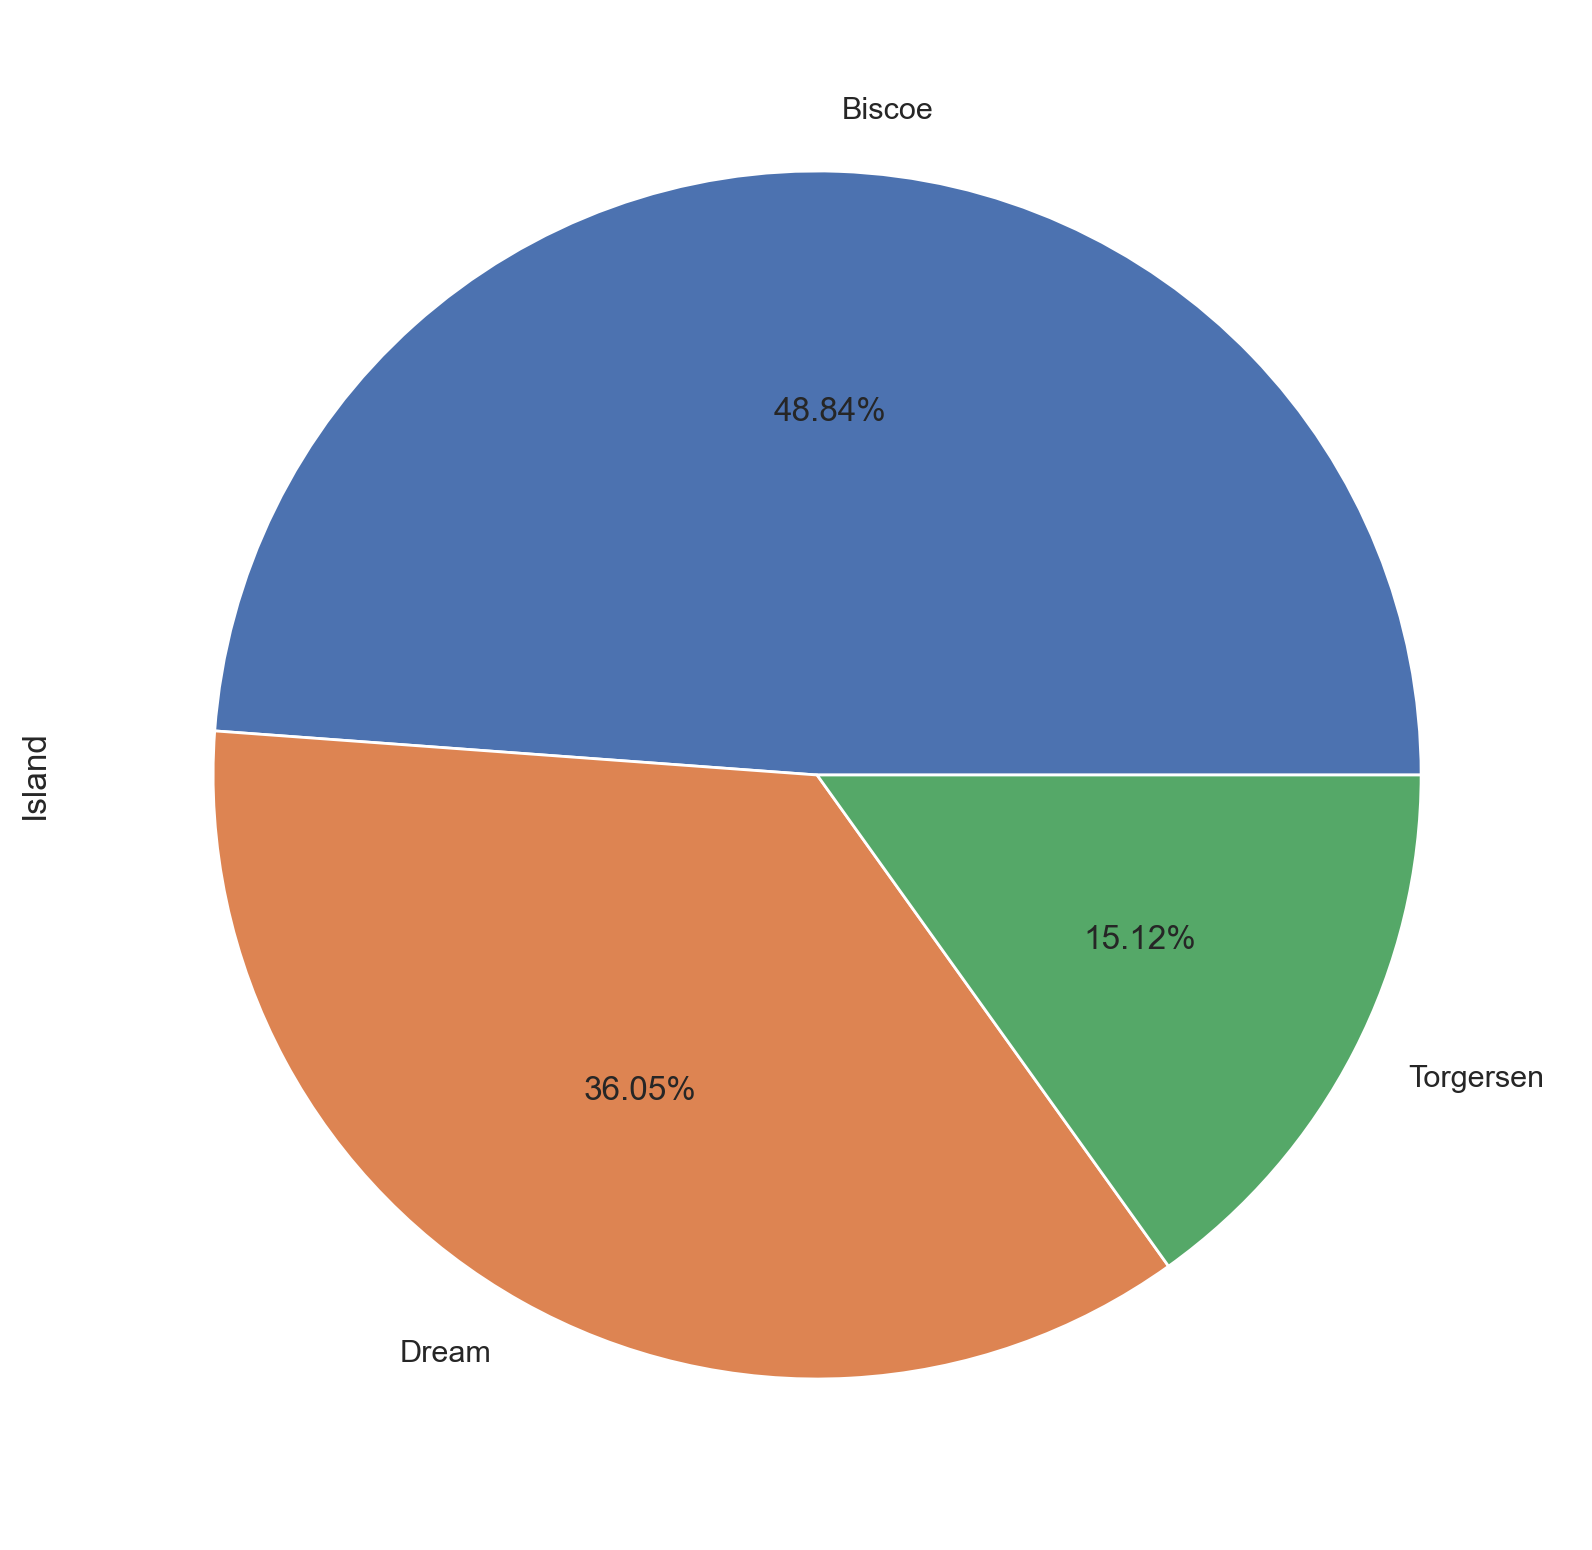

In [477]:
cnt_i.plot(kind='pie',autopct='%1.2f%%')
plt.show()

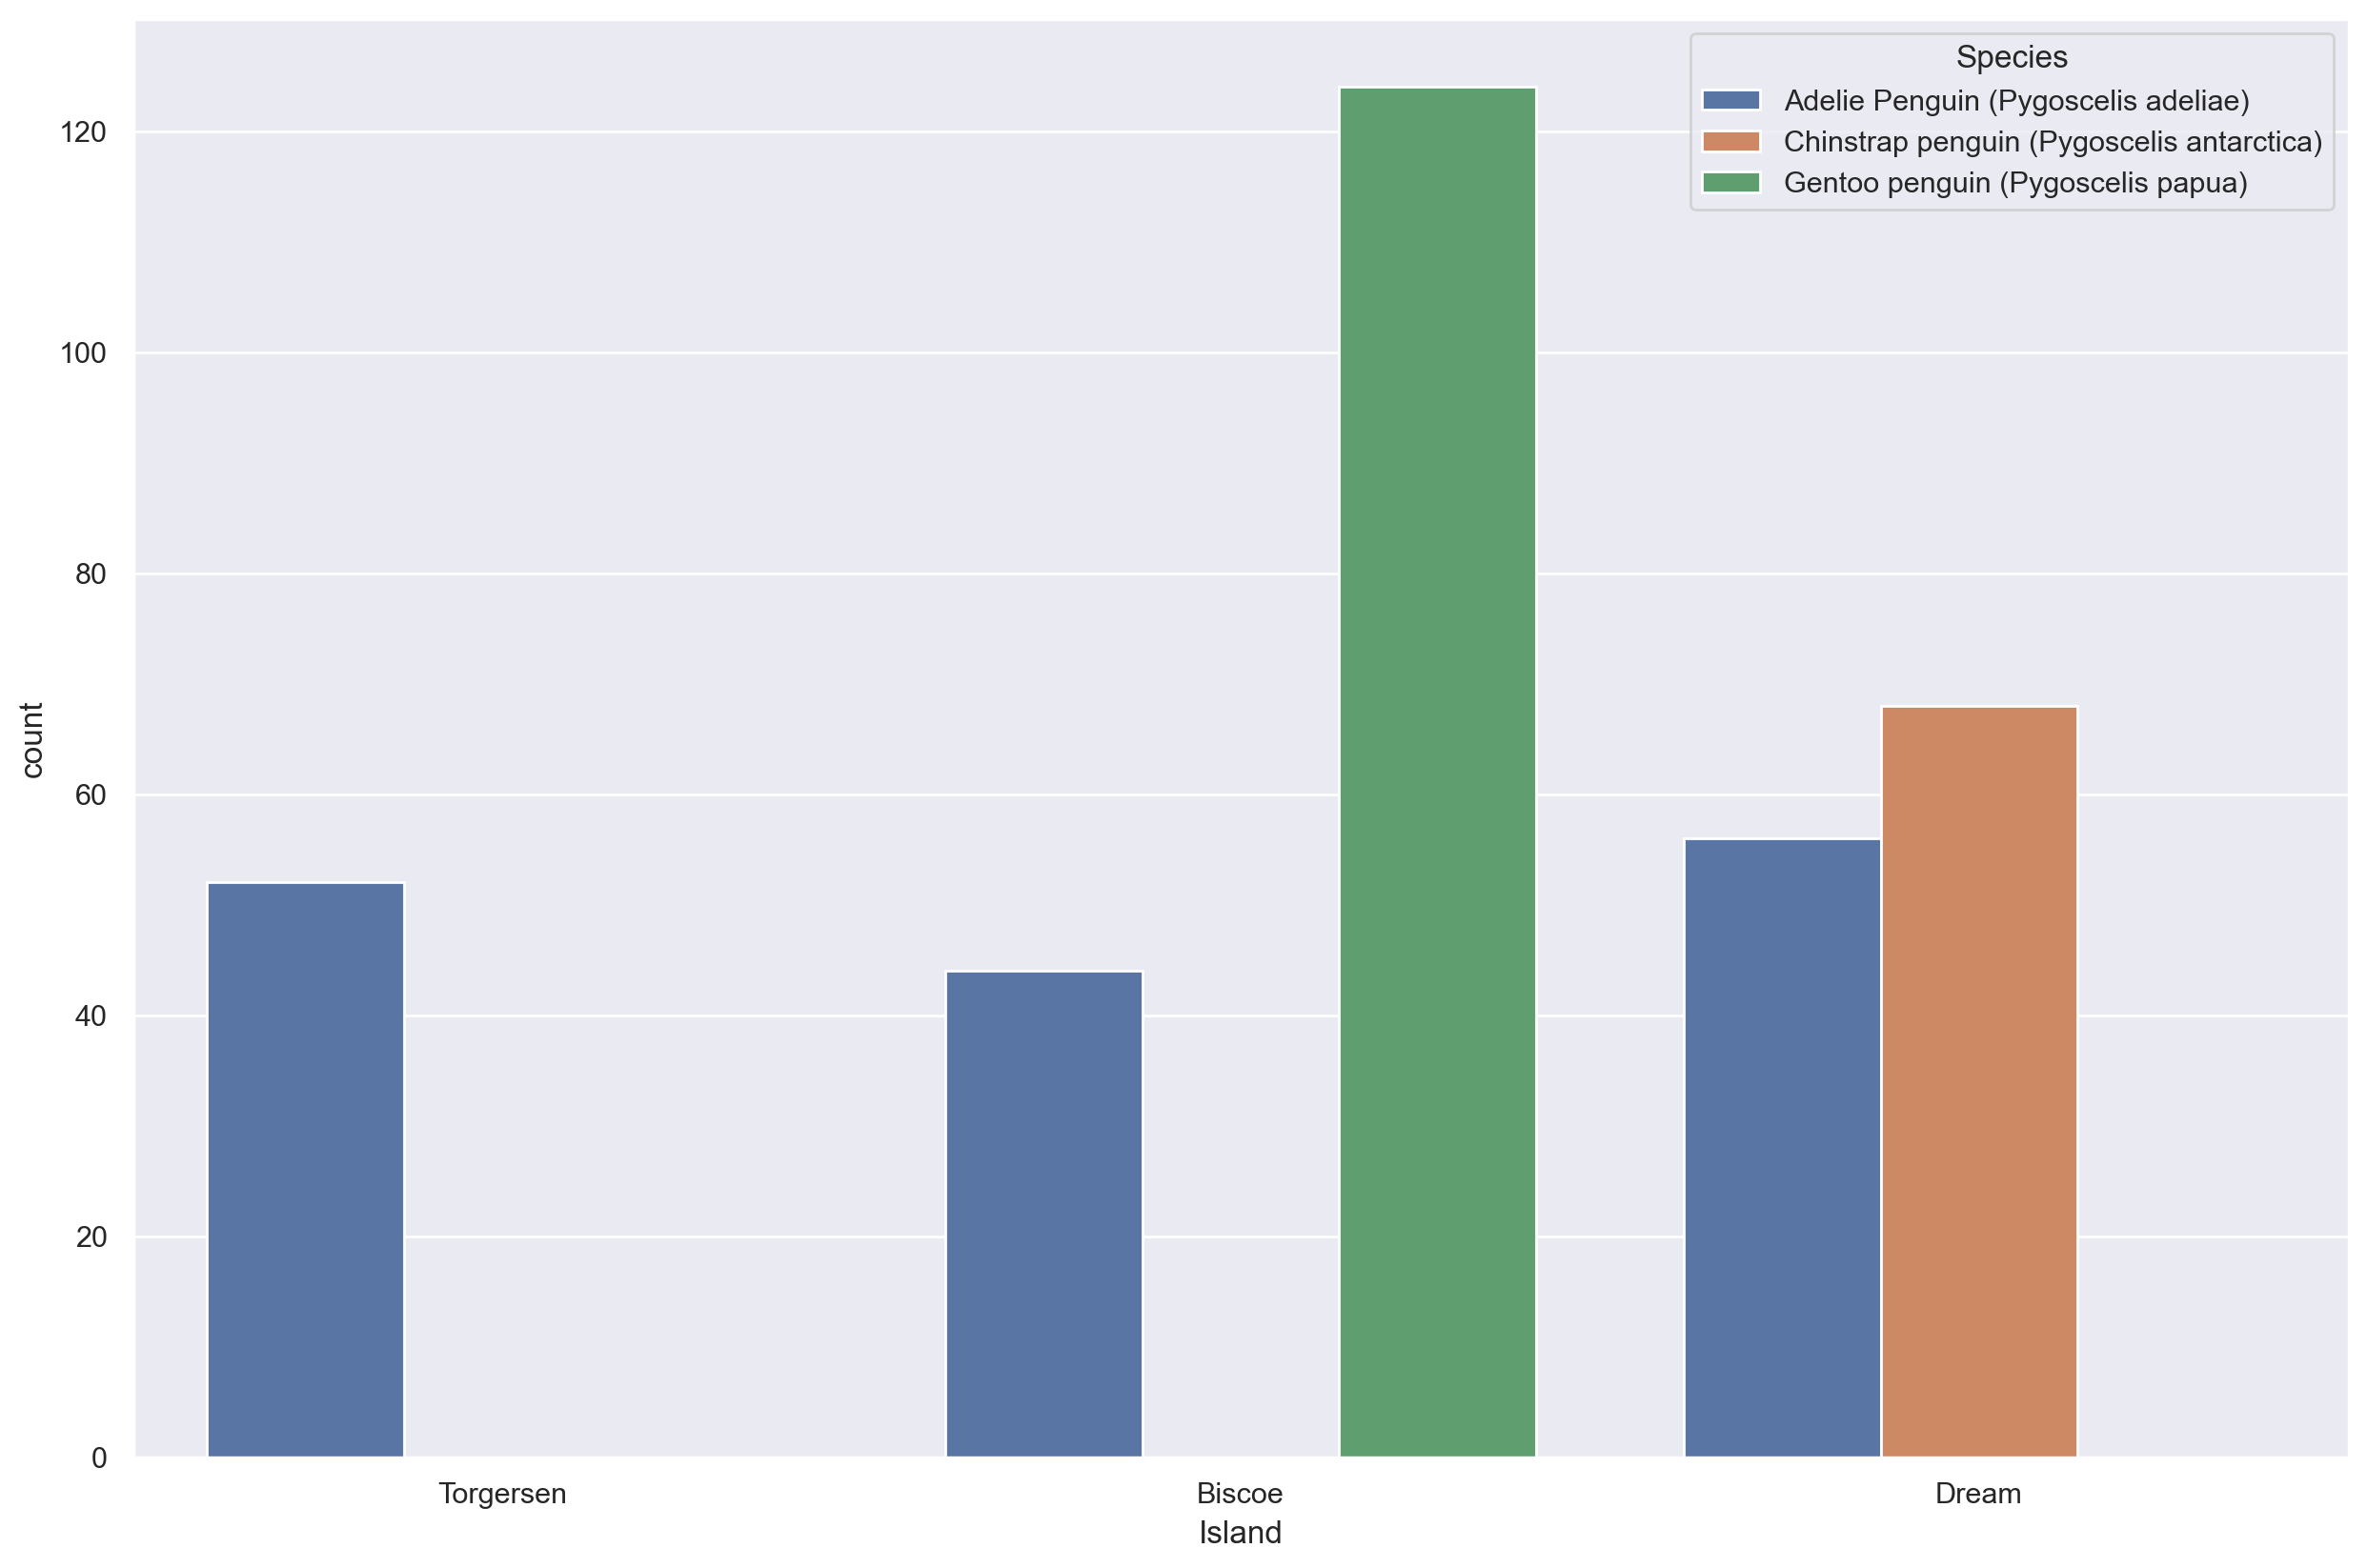

In [478]:
sns.countplot(x=df['Island'],data=df,hue='Species')
plt.show()

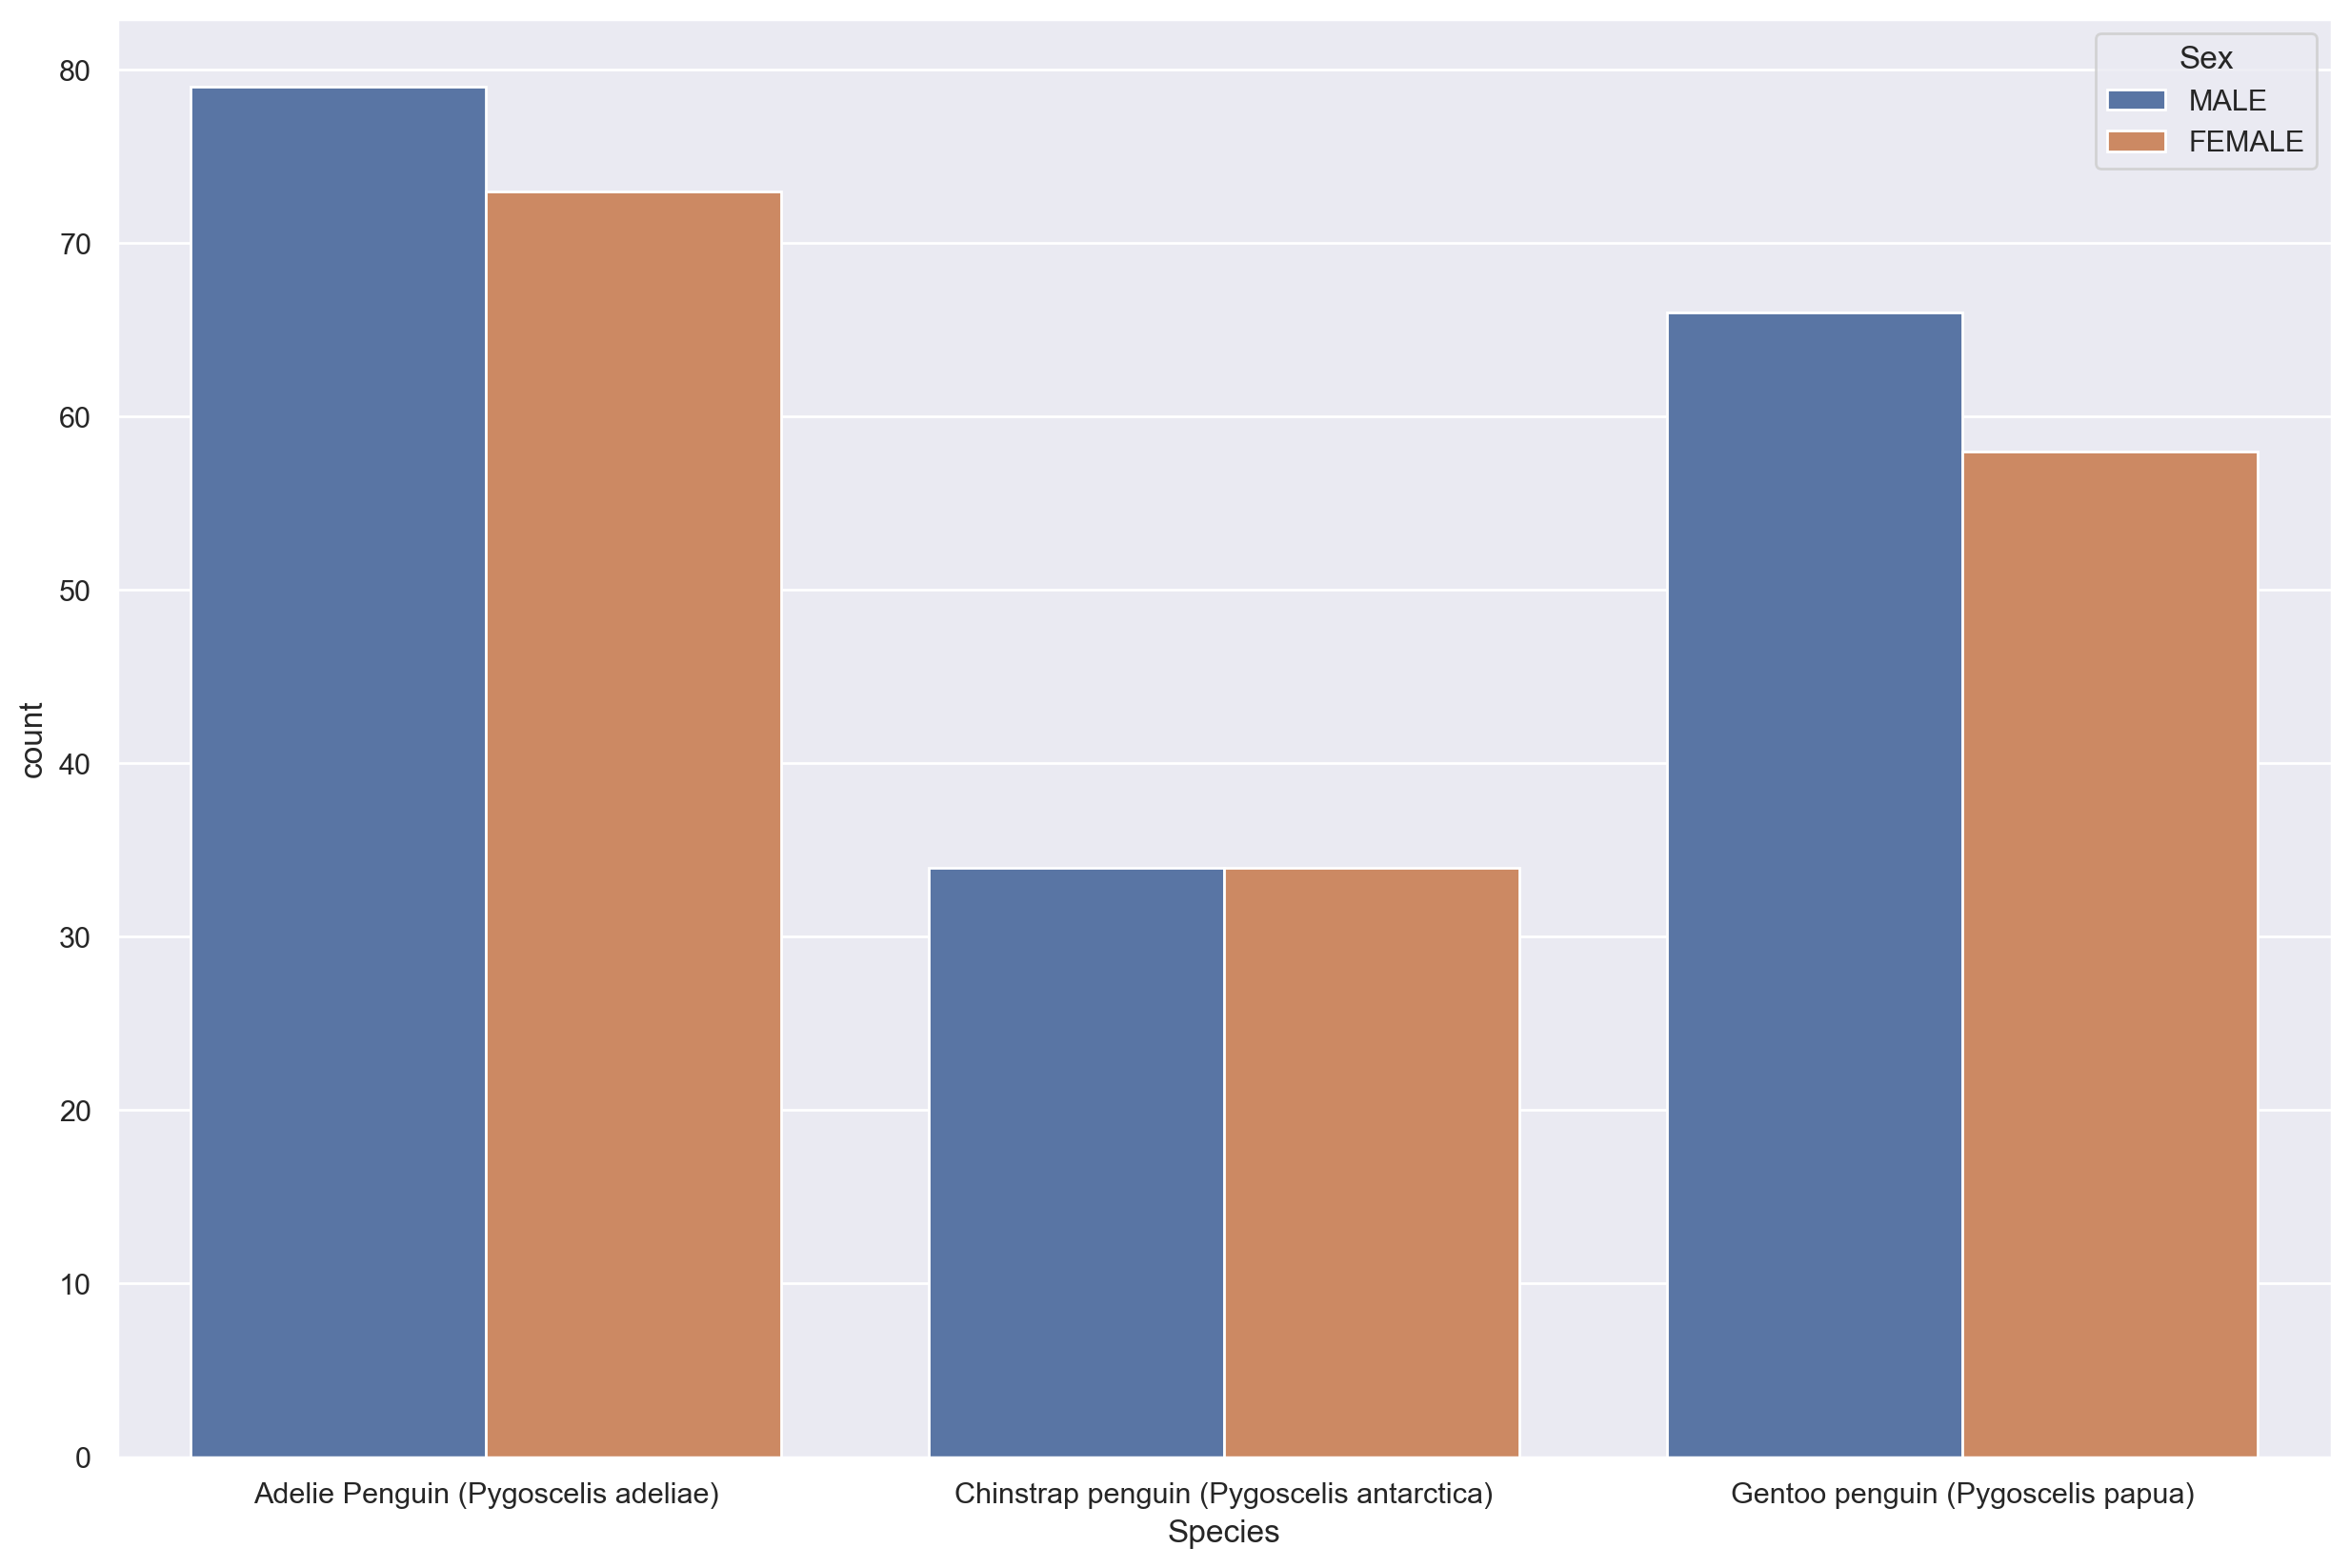

In [479]:
sns.countplot(x=df['Species'],data=df,hue='Sex')
plt.show()

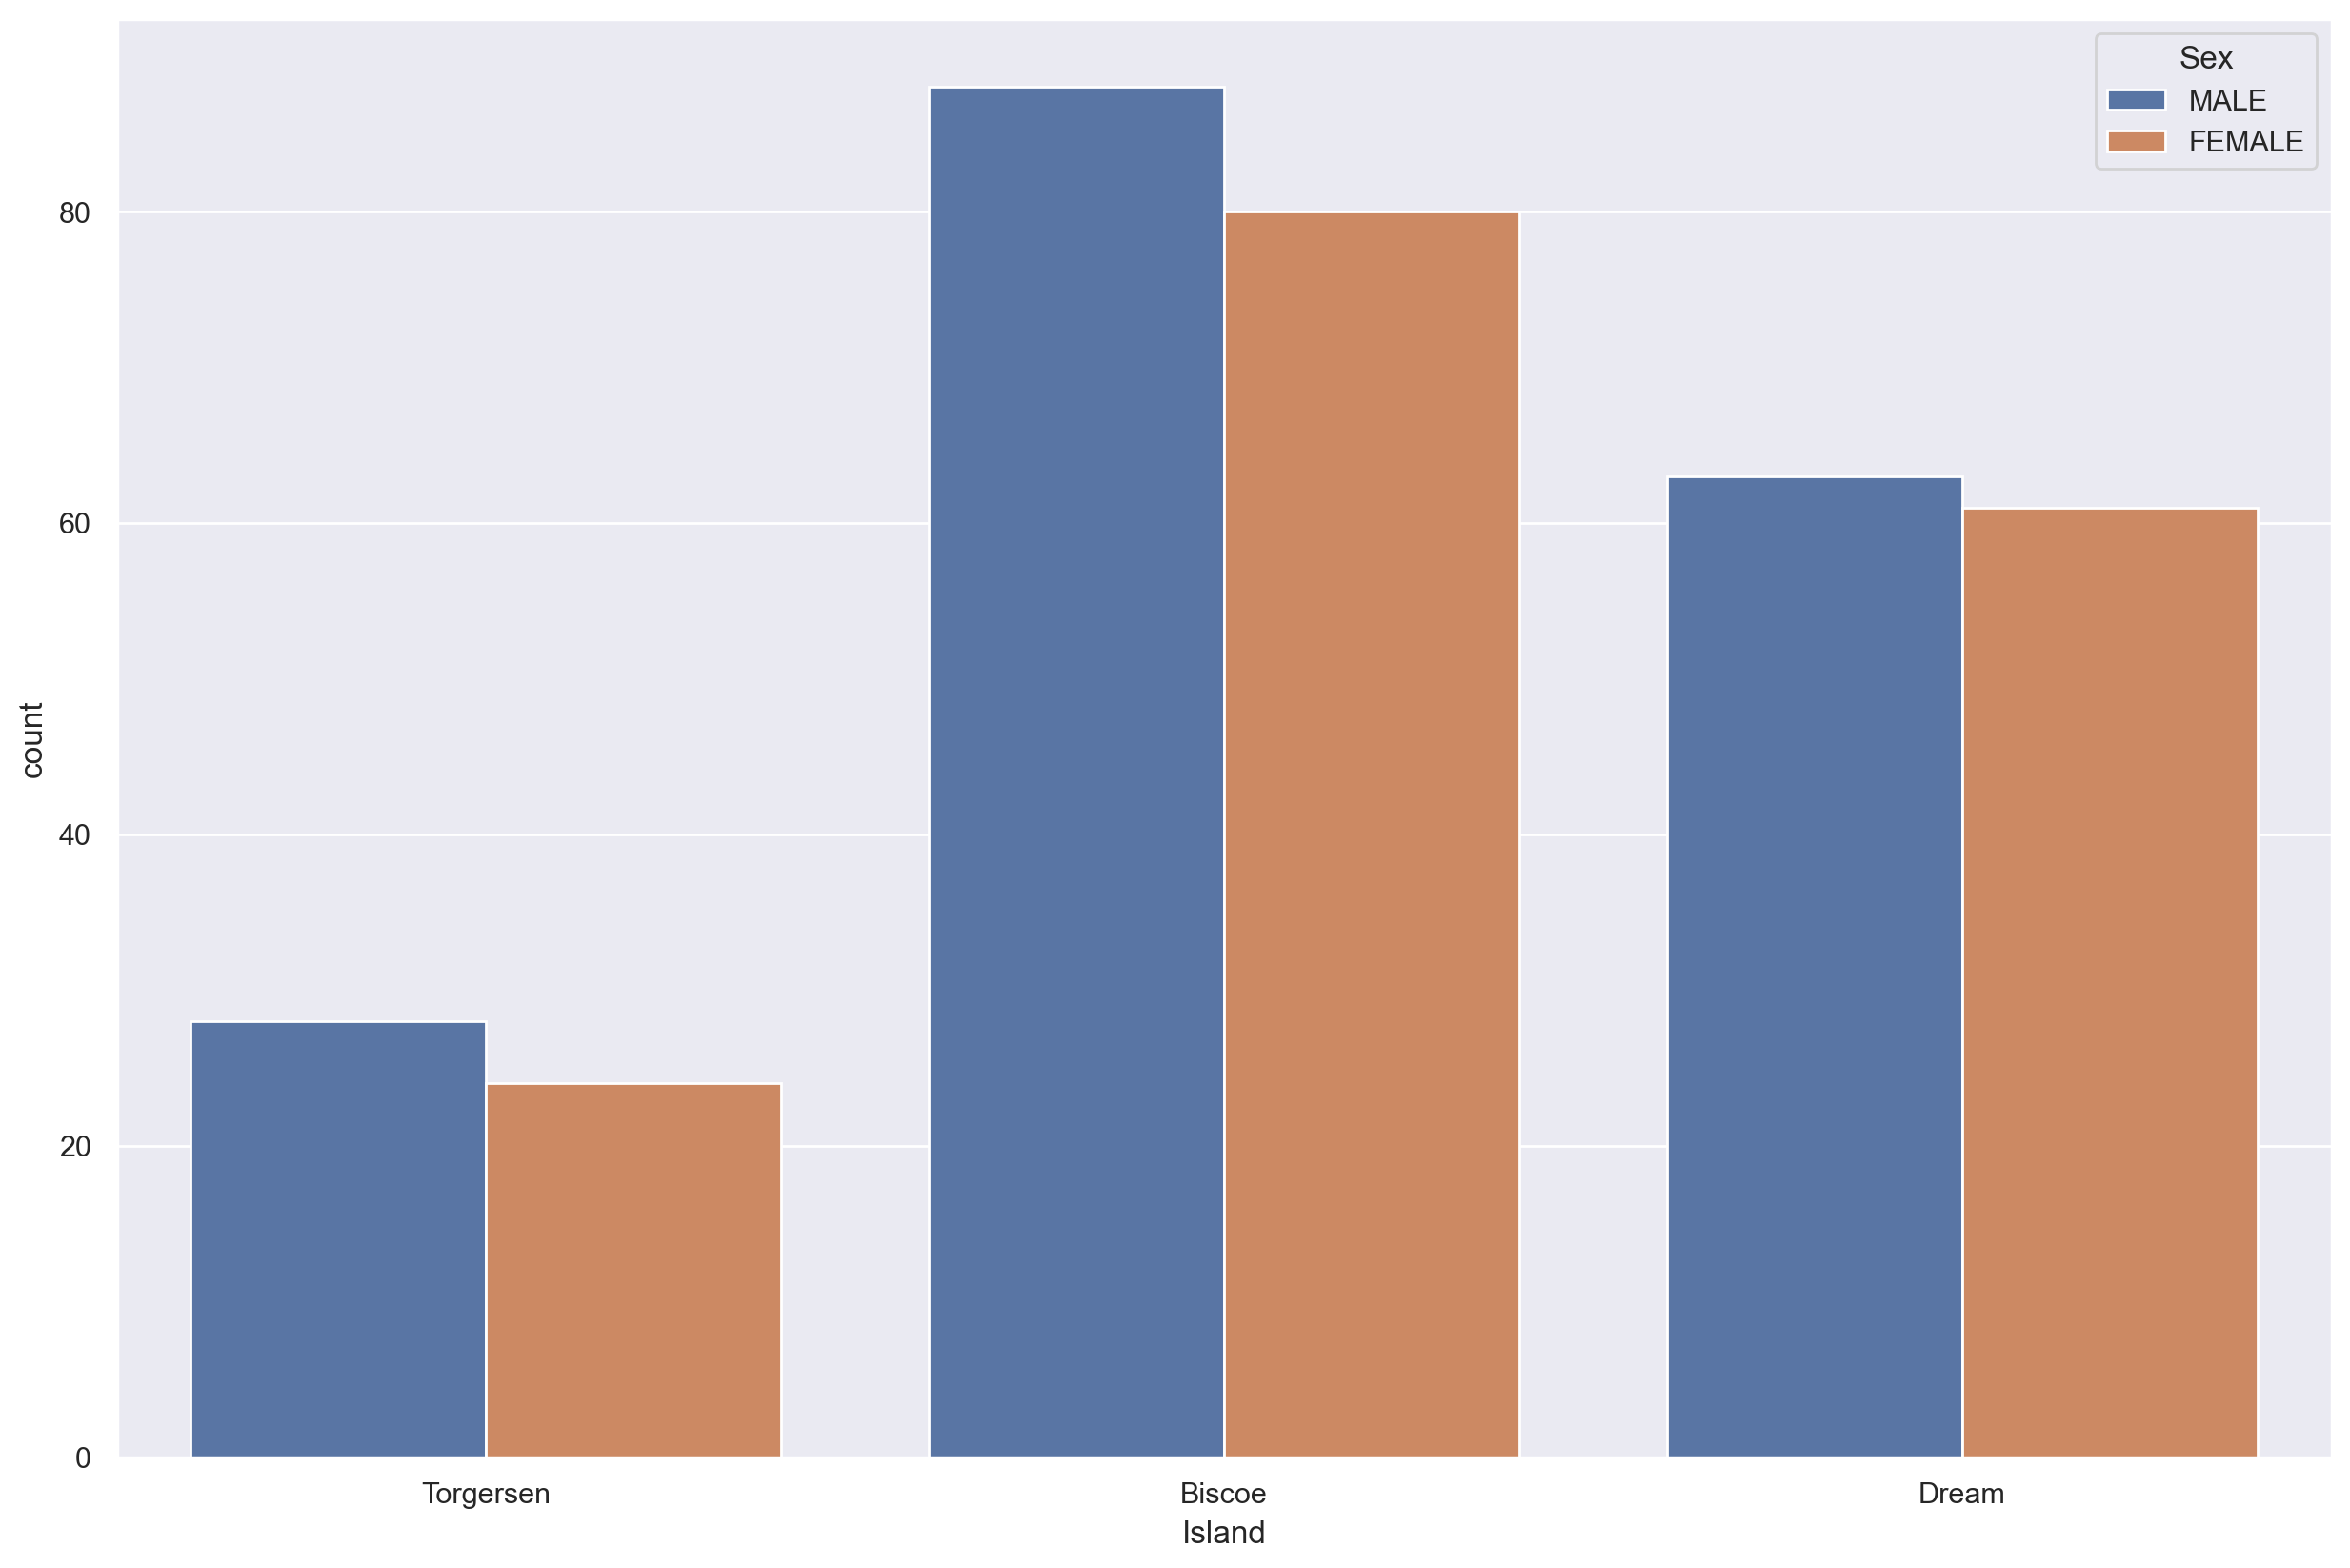

In [480]:
sns.countplot(x=df['Island'],data=df,hue='Sex')
plt.show()

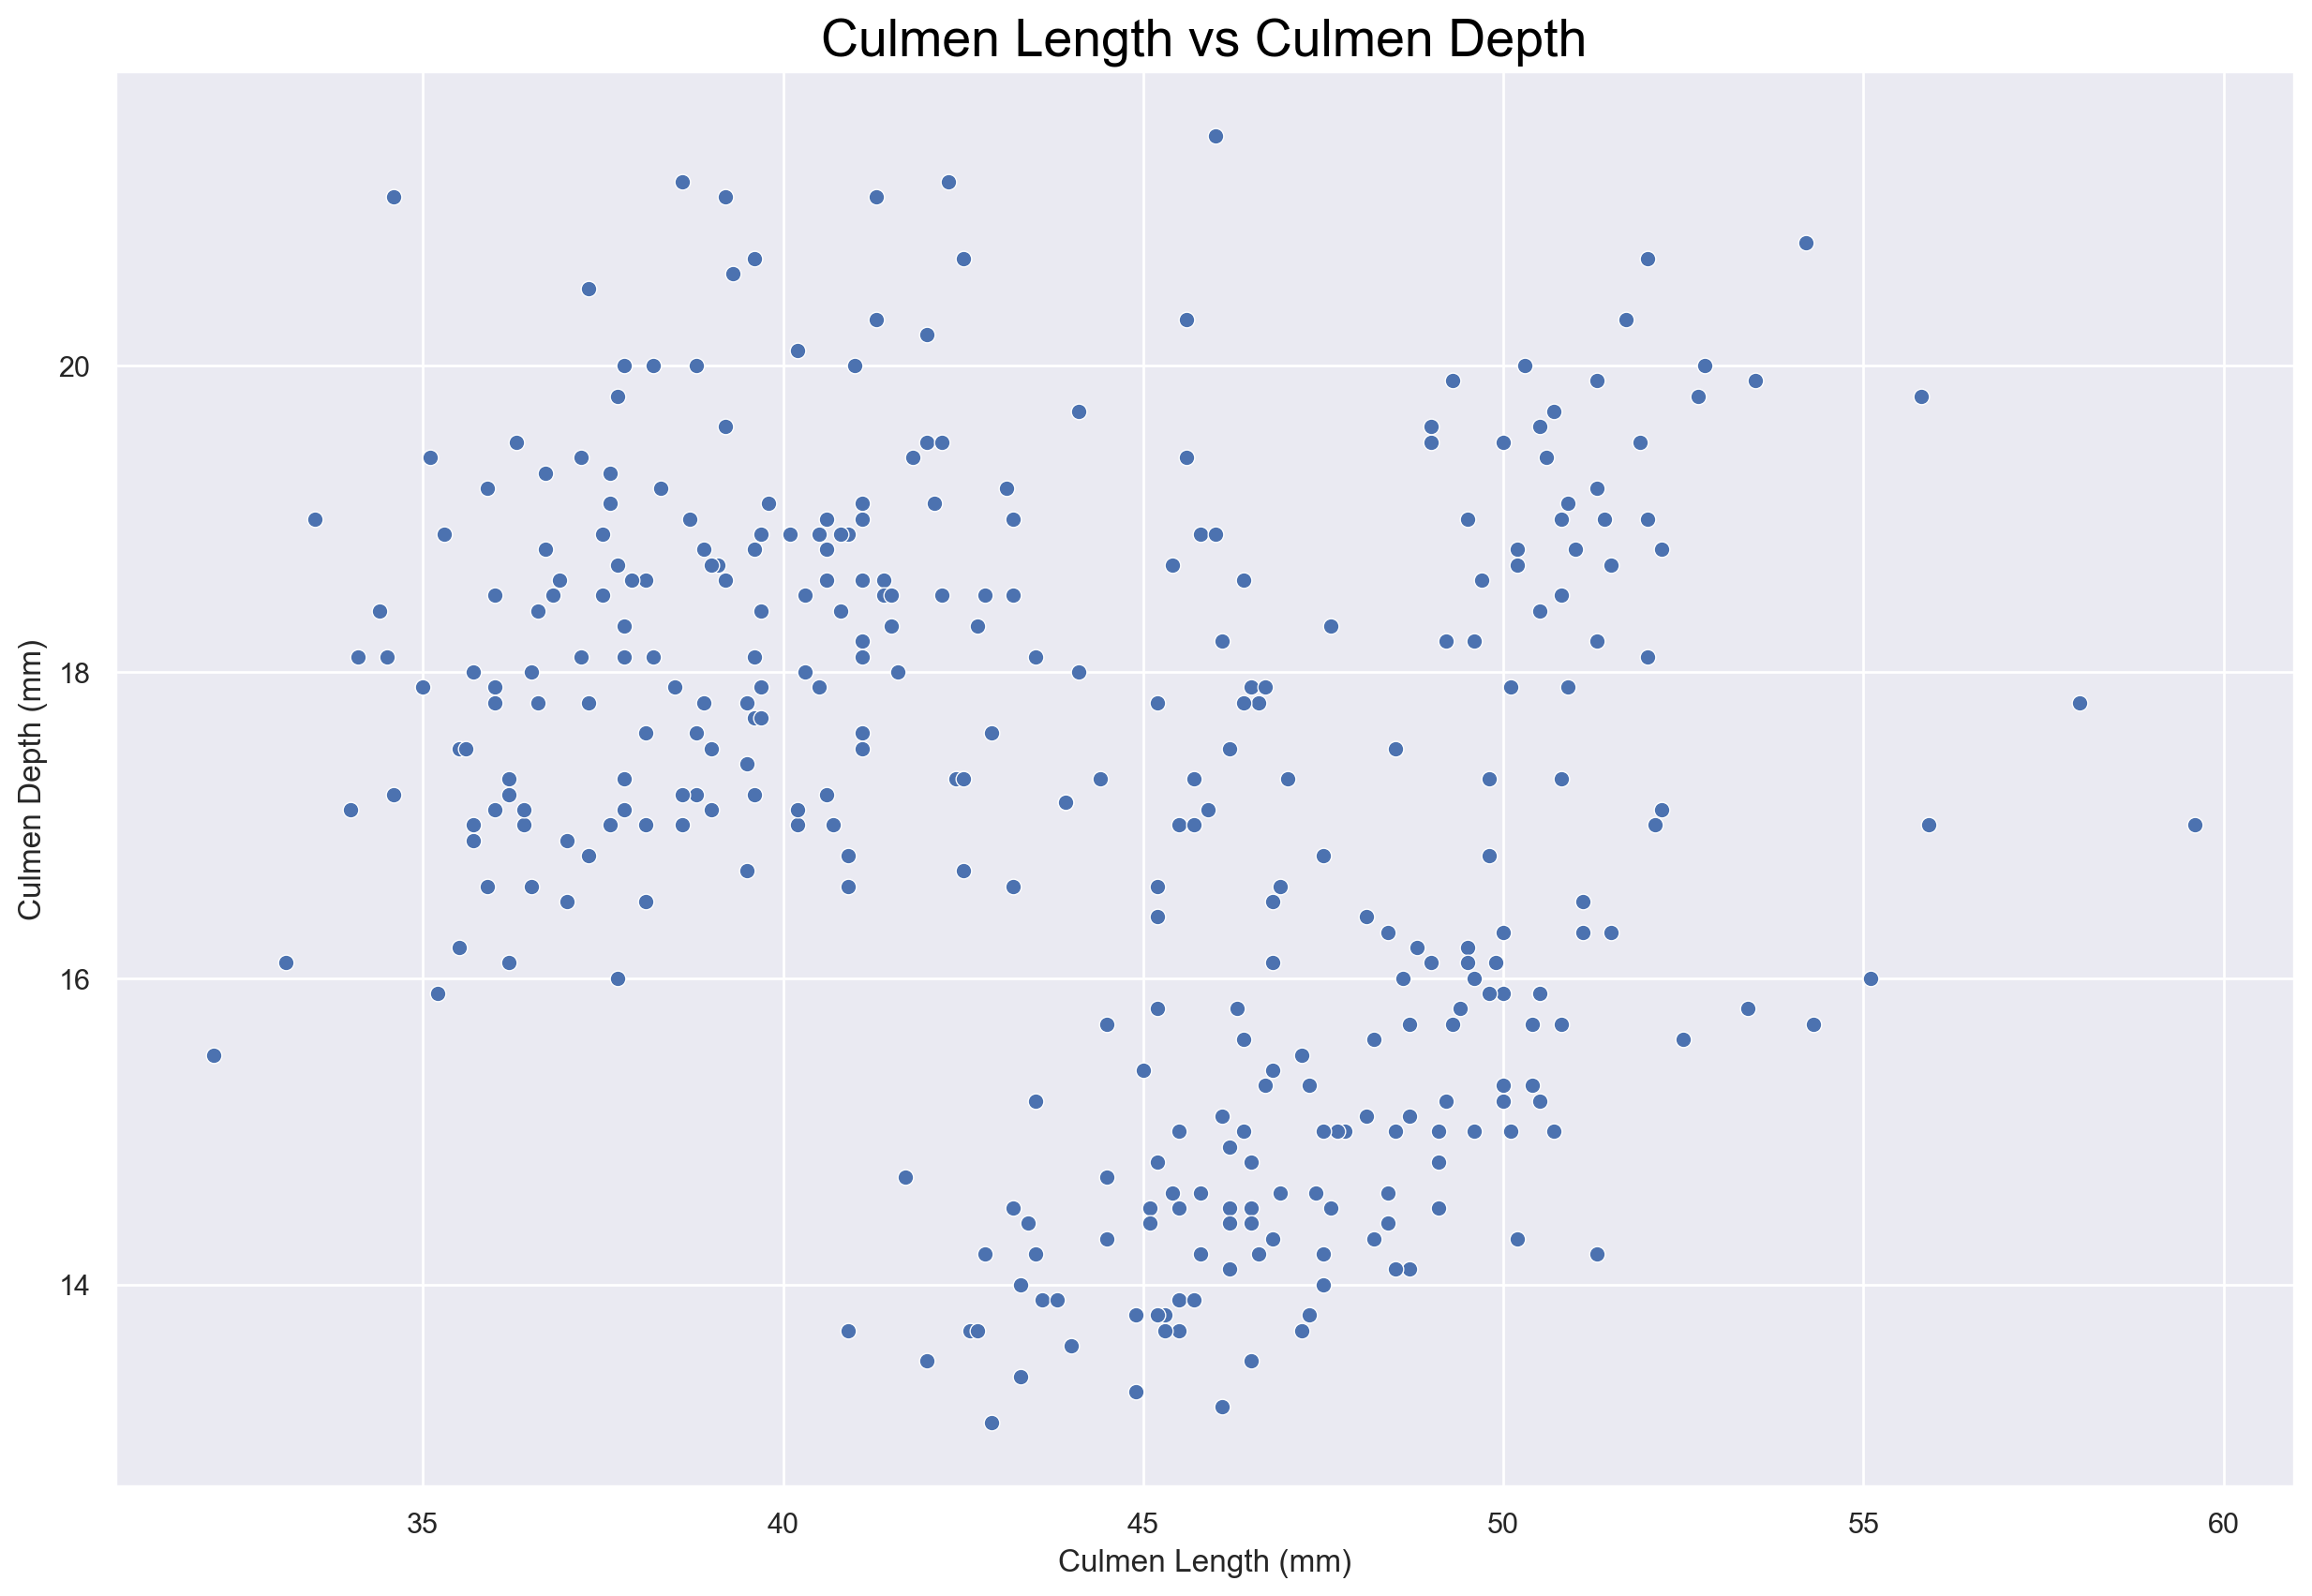

In [481]:
sns.scatterplot(x=df['Culmen Length (mm)'],y=df['Culmen Depth (mm)'],data=df)
plt.title('Culmen Length vs Culmen Depth',size=20,color='black')
plt.show()

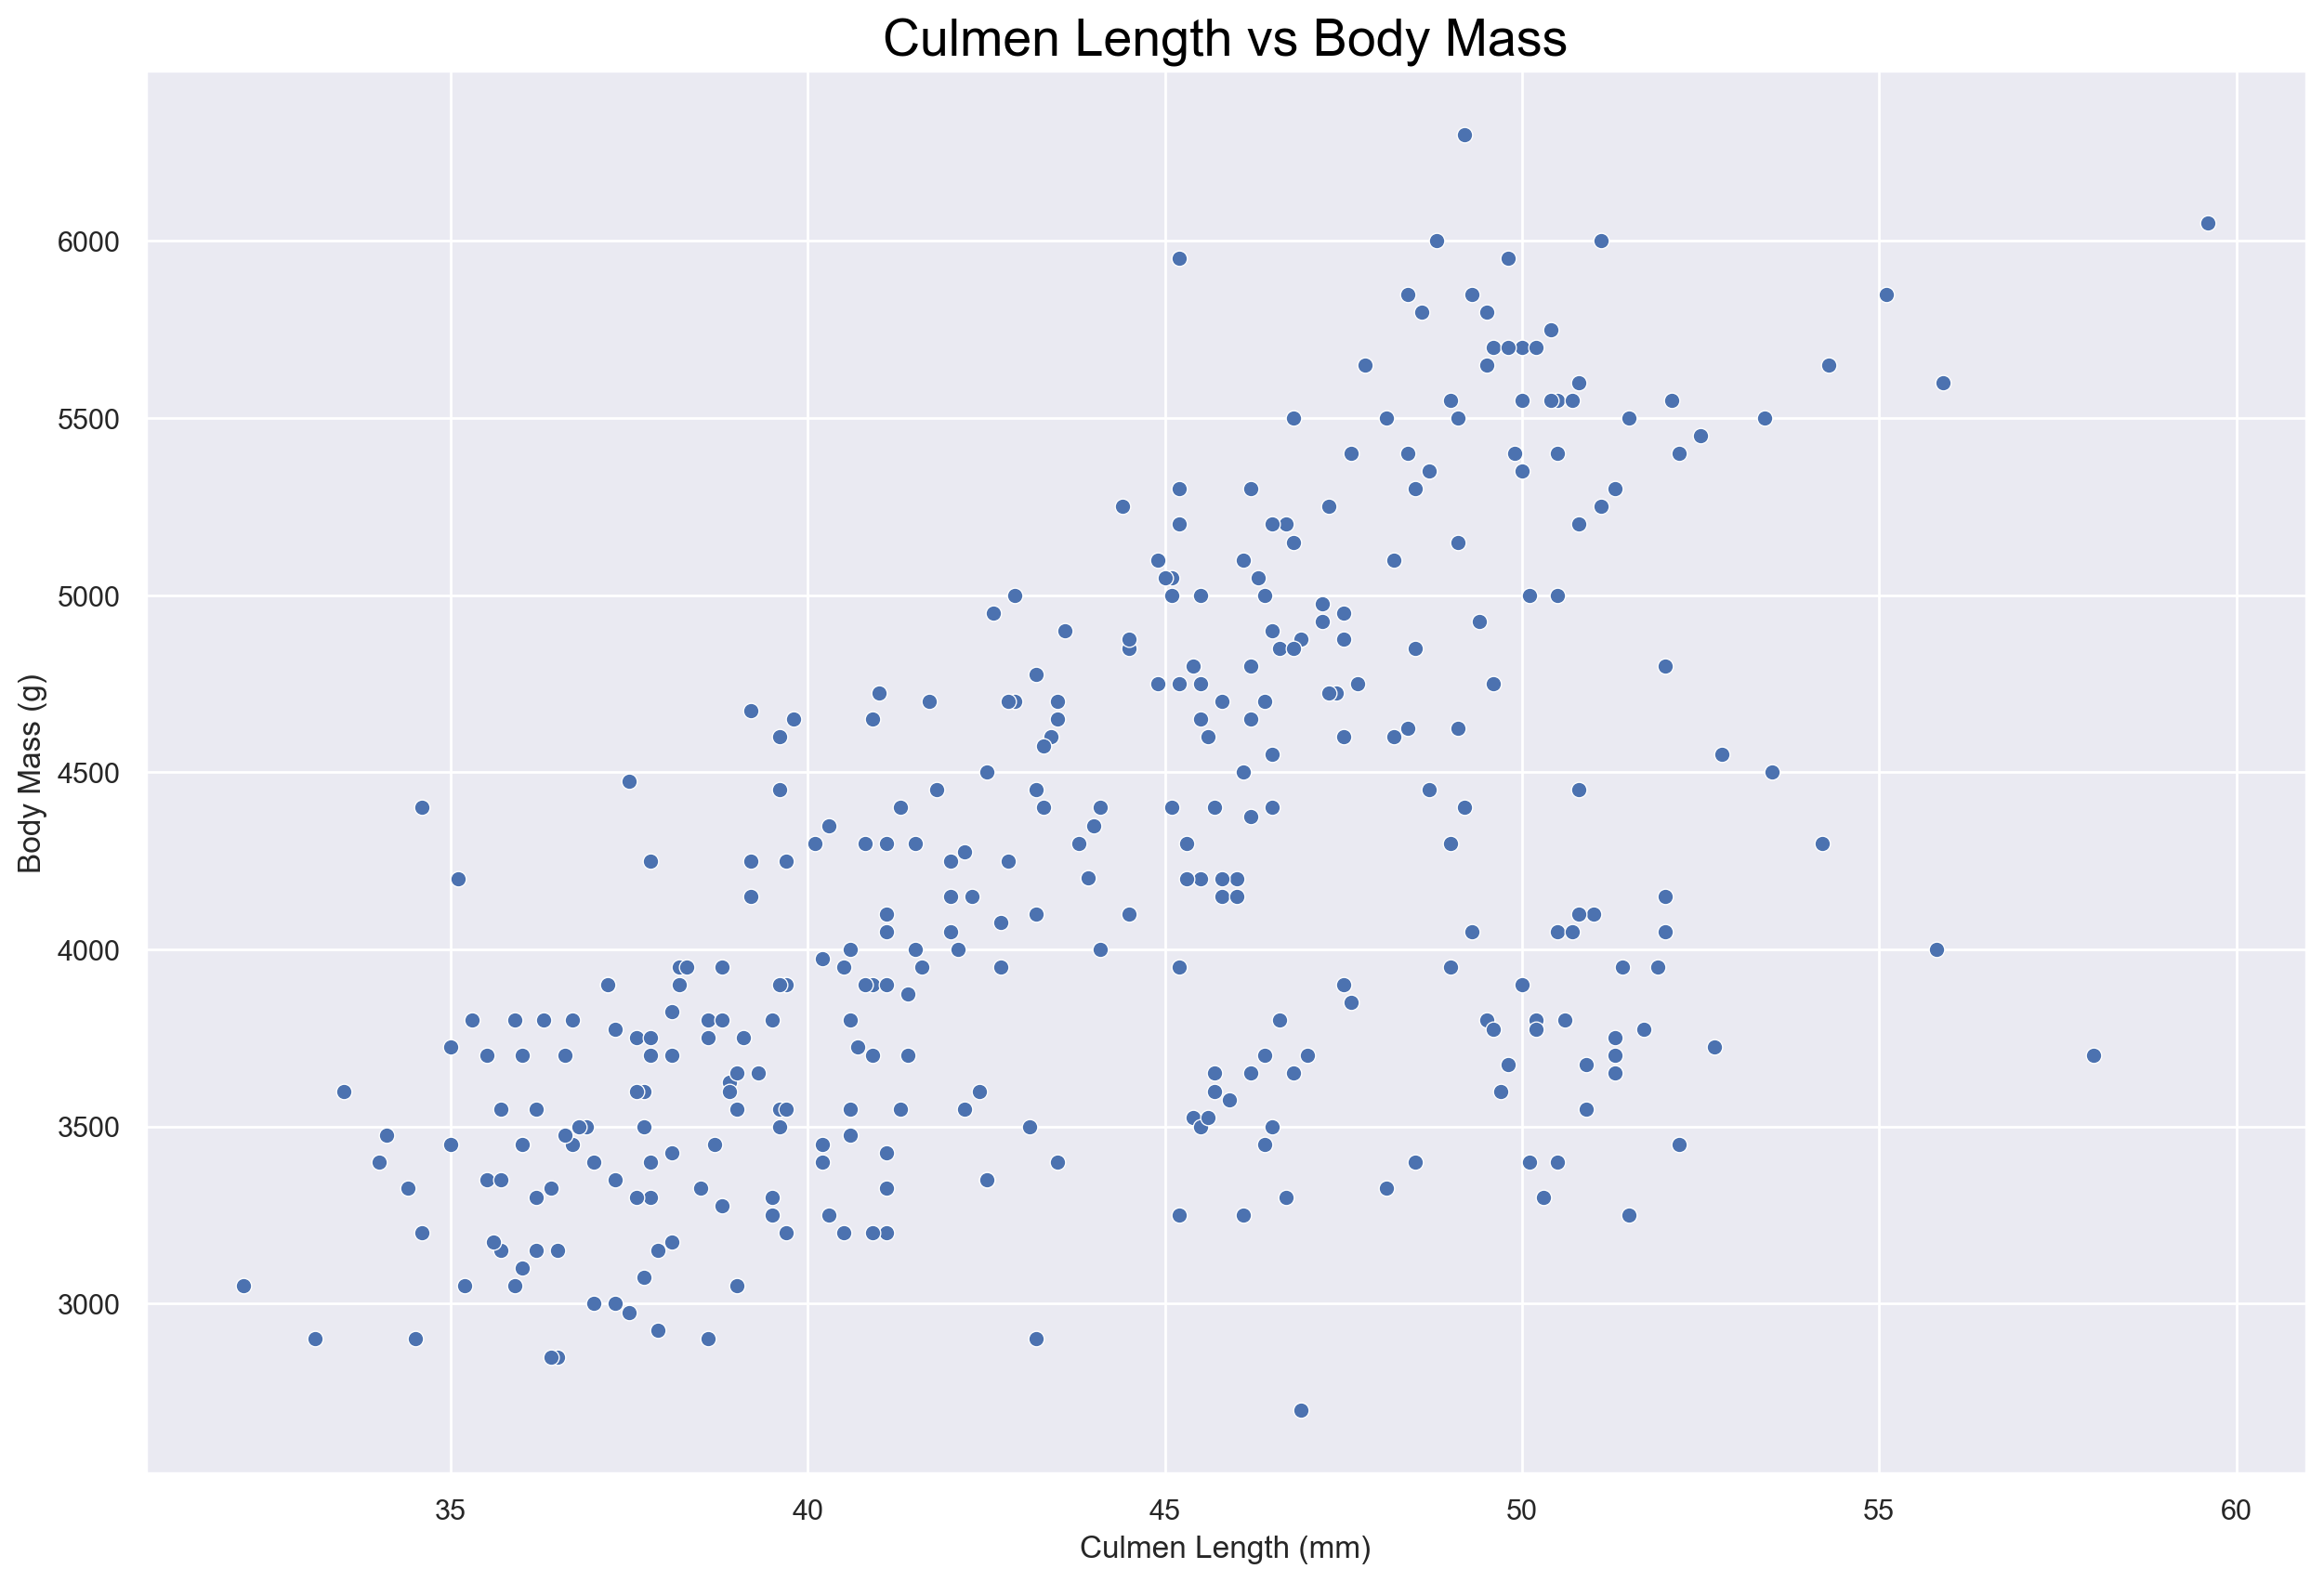

In [482]:
sns.scatterplot(x=df['Culmen Length (mm)'],y=df['Body Mass (g)'],data=df)
plt.title('Culmen Length vs Body Mass',size=20,color='black')
plt.show()

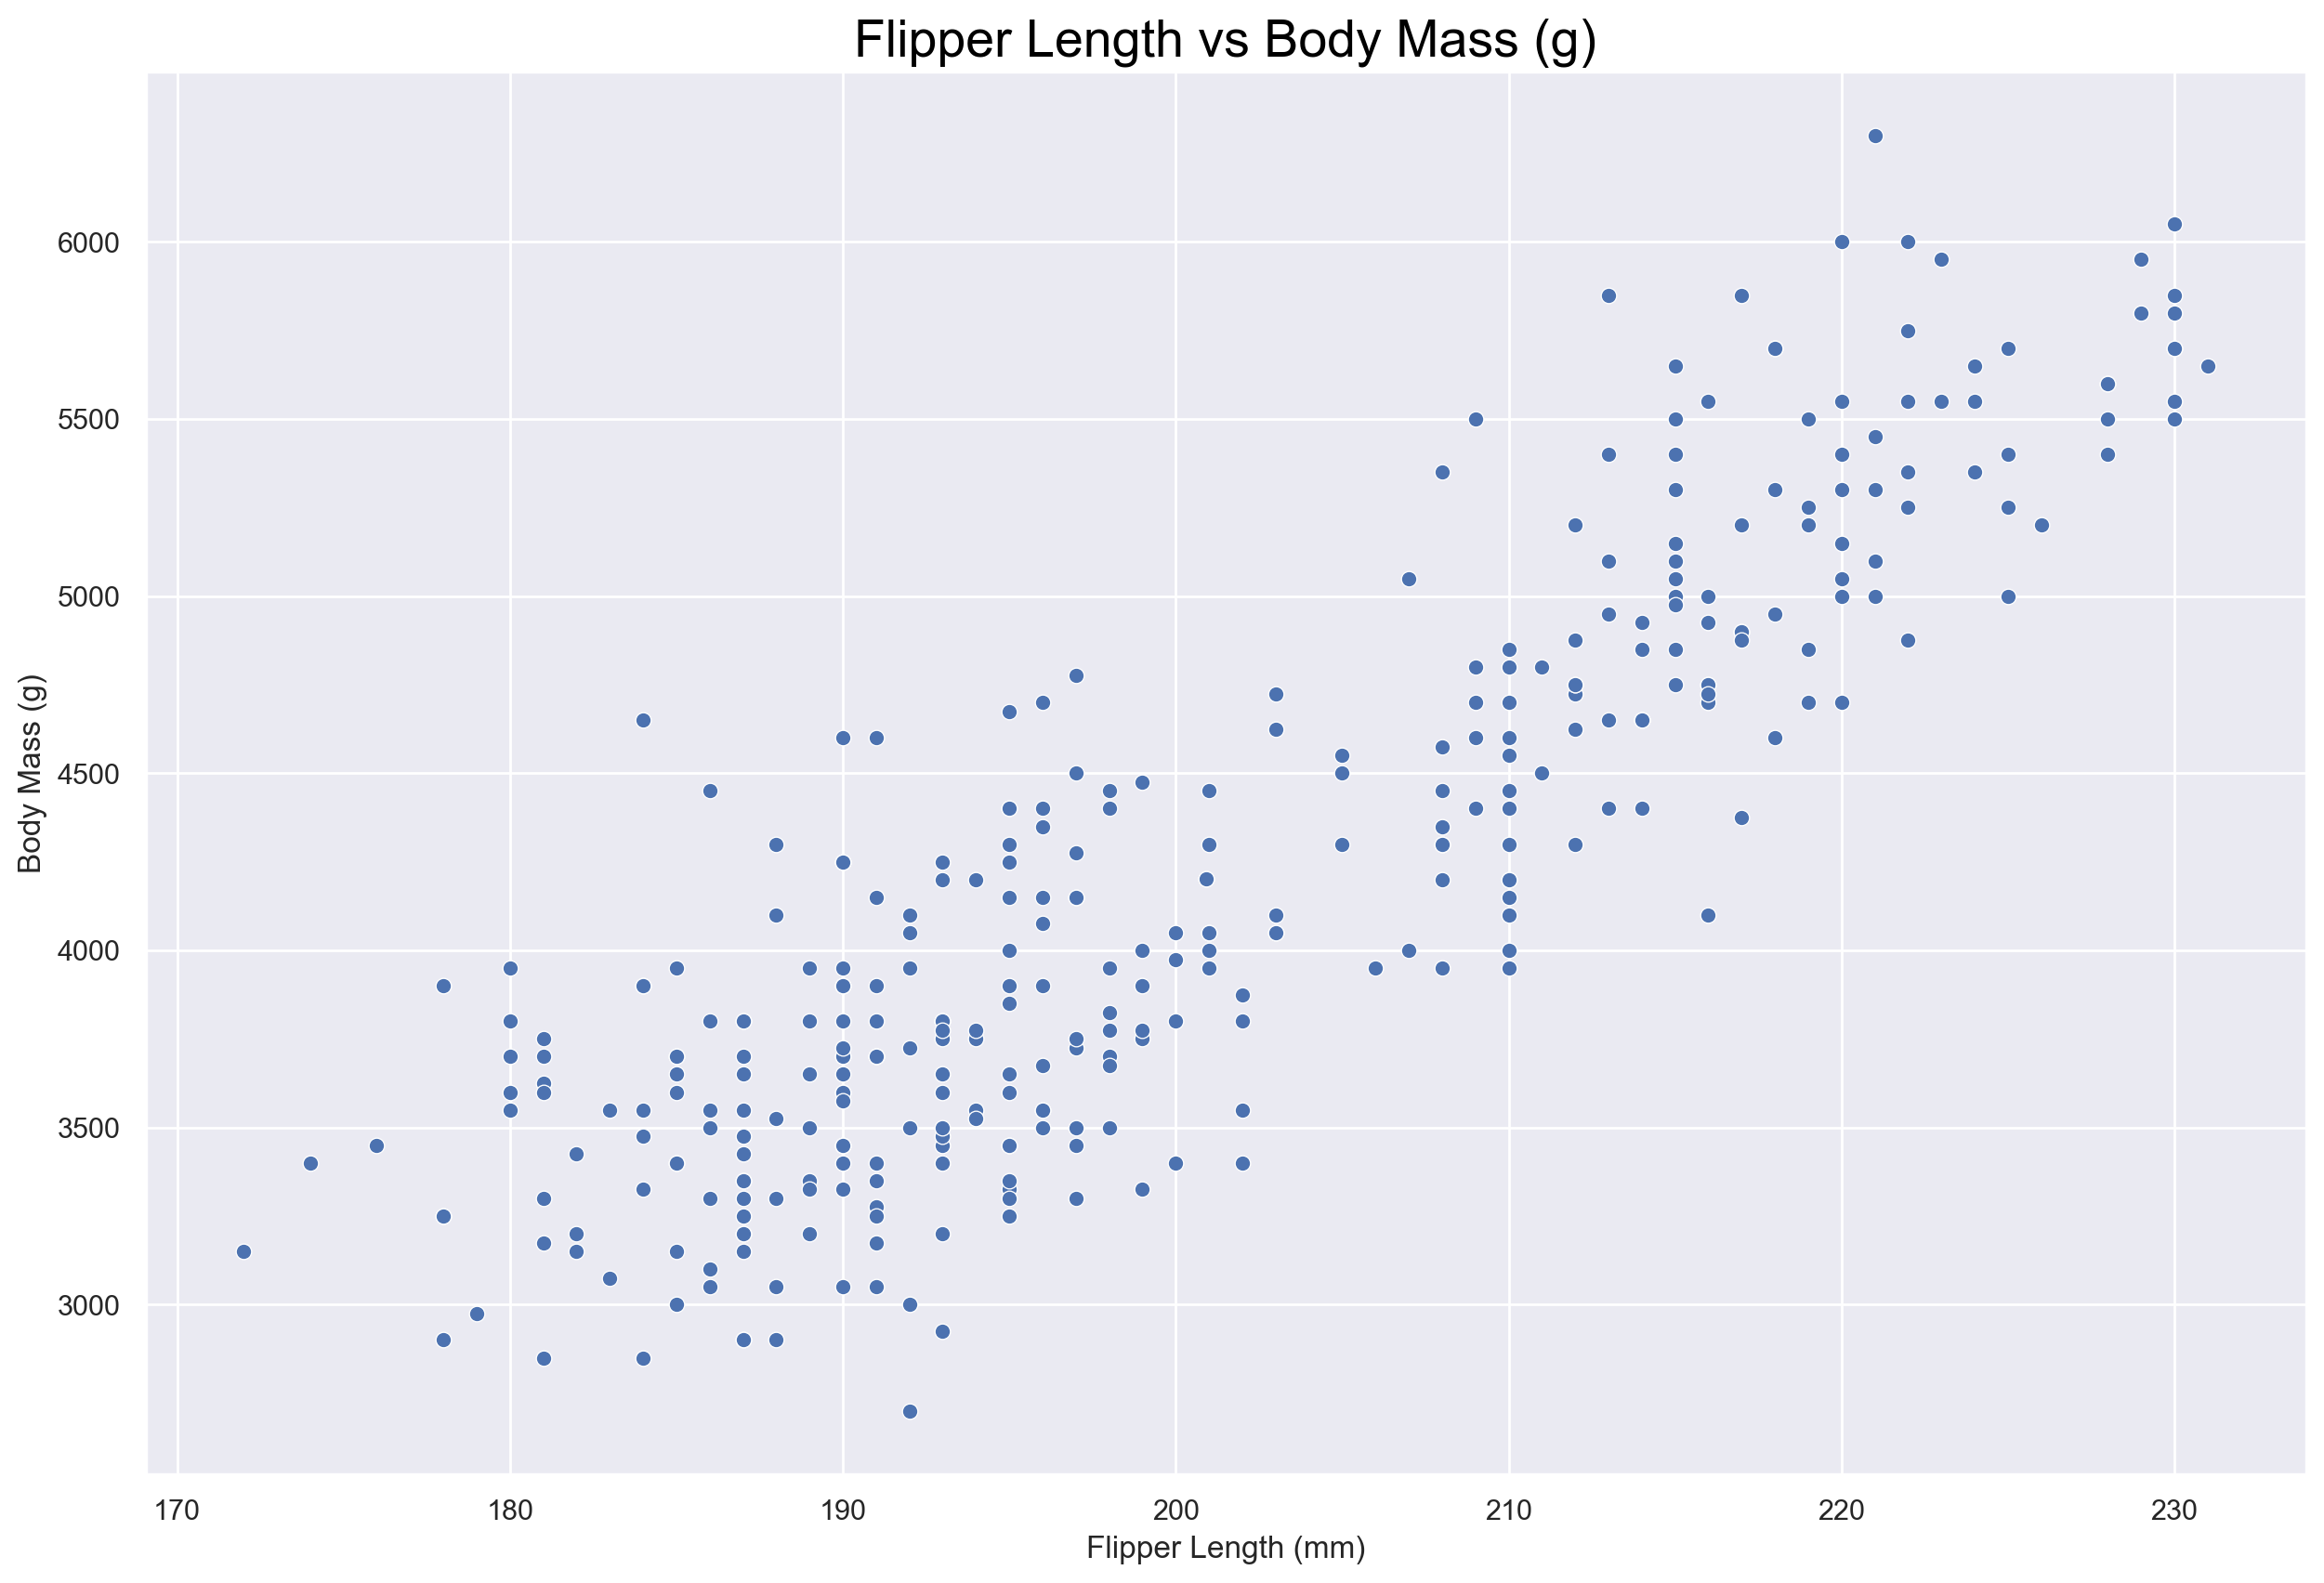

In [483]:
sns.scatterplot(x=df['Flipper Length (mm)'],y=df['Body Mass (g)'],data=df)
plt.title('Flipper Length vs Body Mass (g)',size=20,color='black')
plt.show()

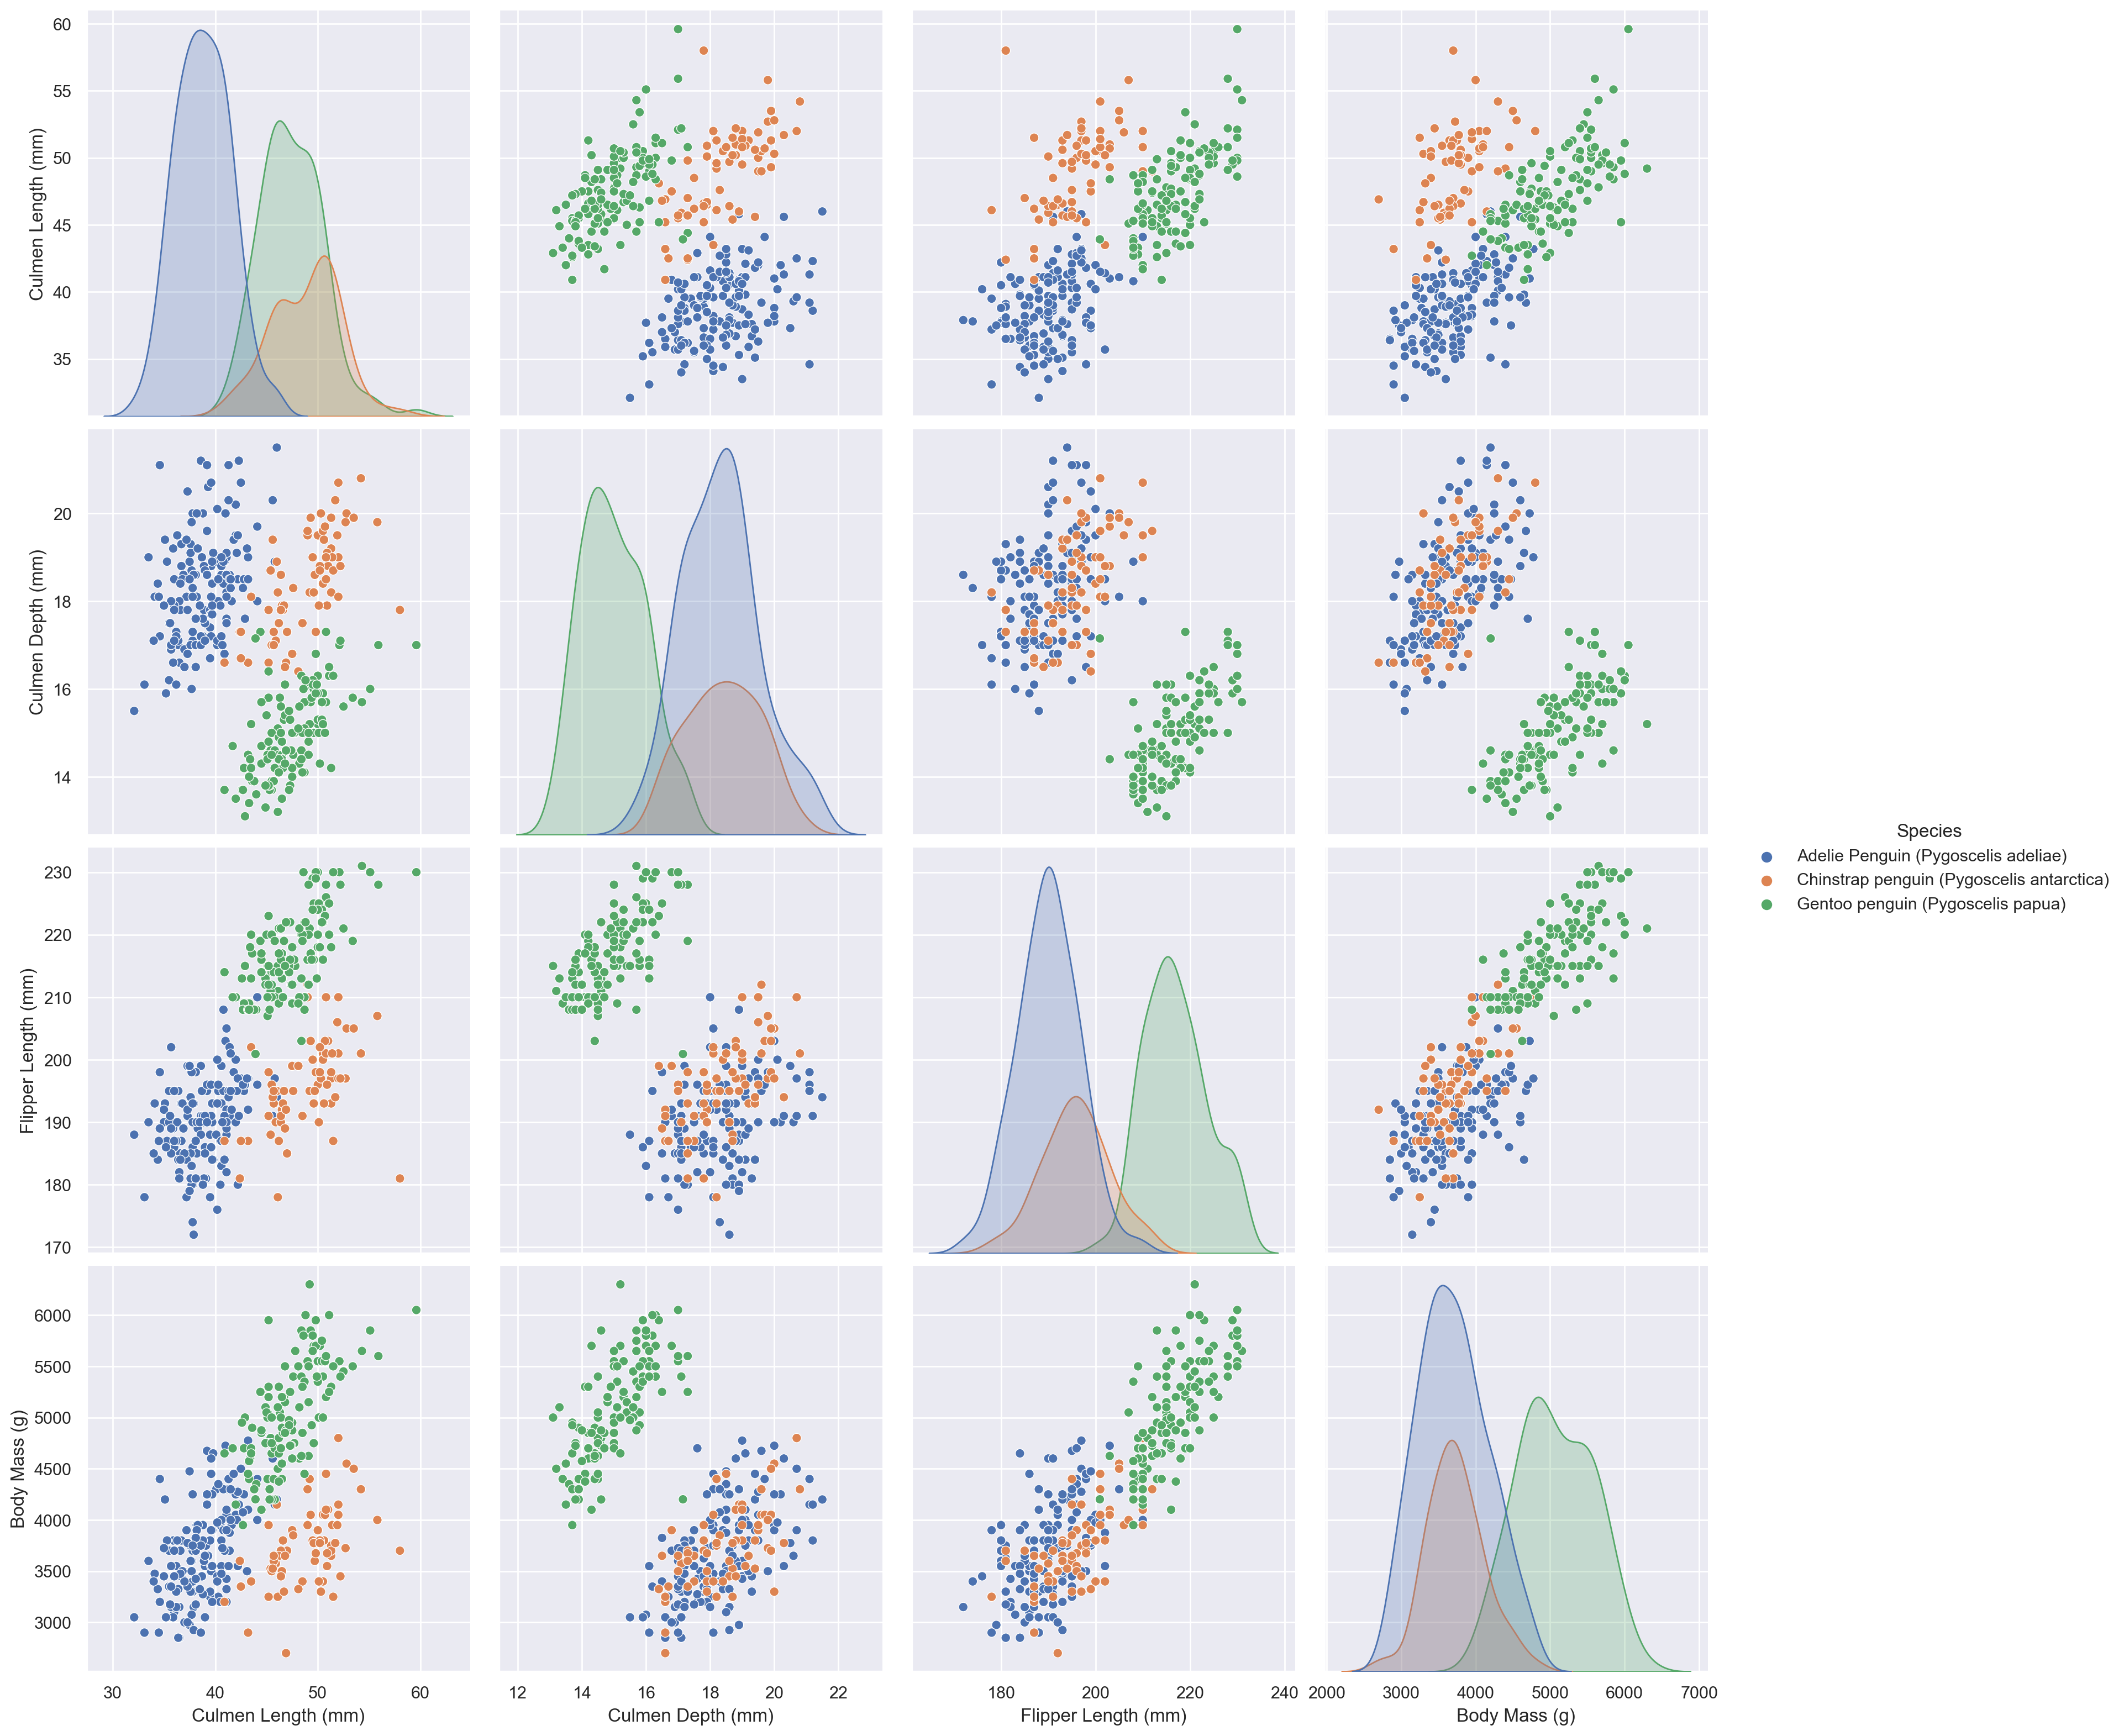

In [484]:
sns.pairplot(df,hue='Species',height=4)
plt.show()

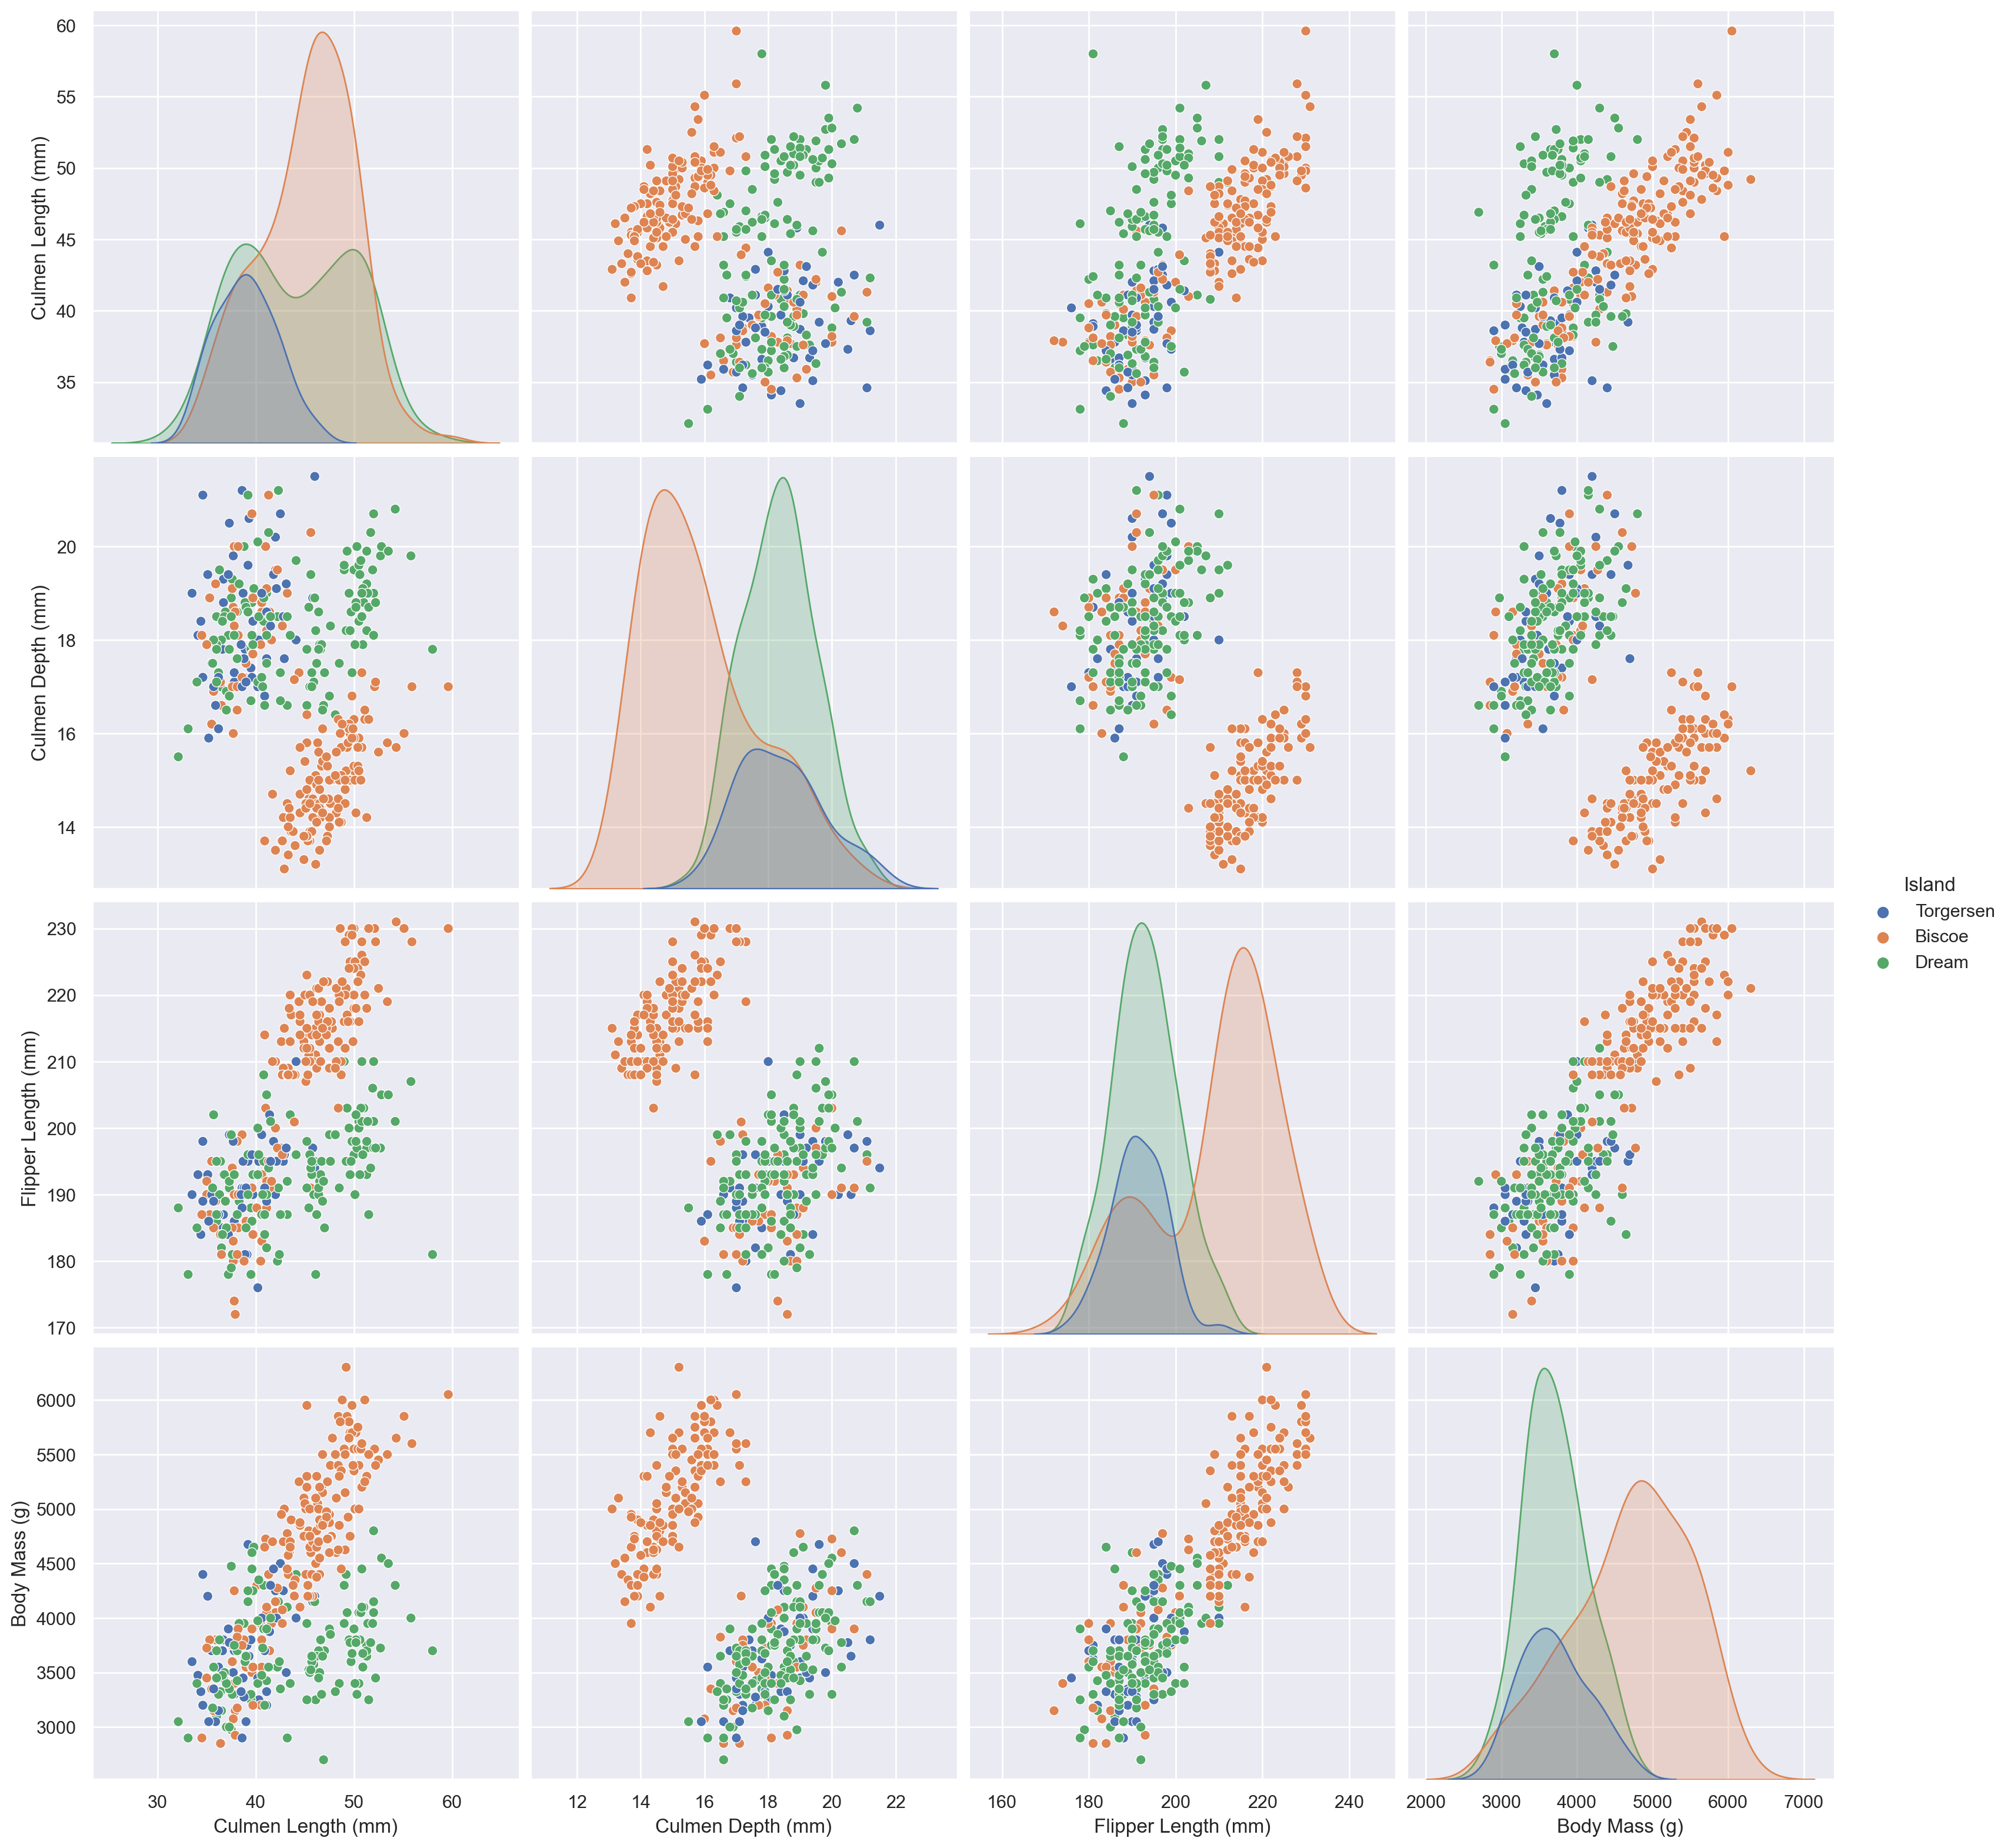

In [485]:
sns.pairplot(df,hue='Island',height=4)
plt.show()

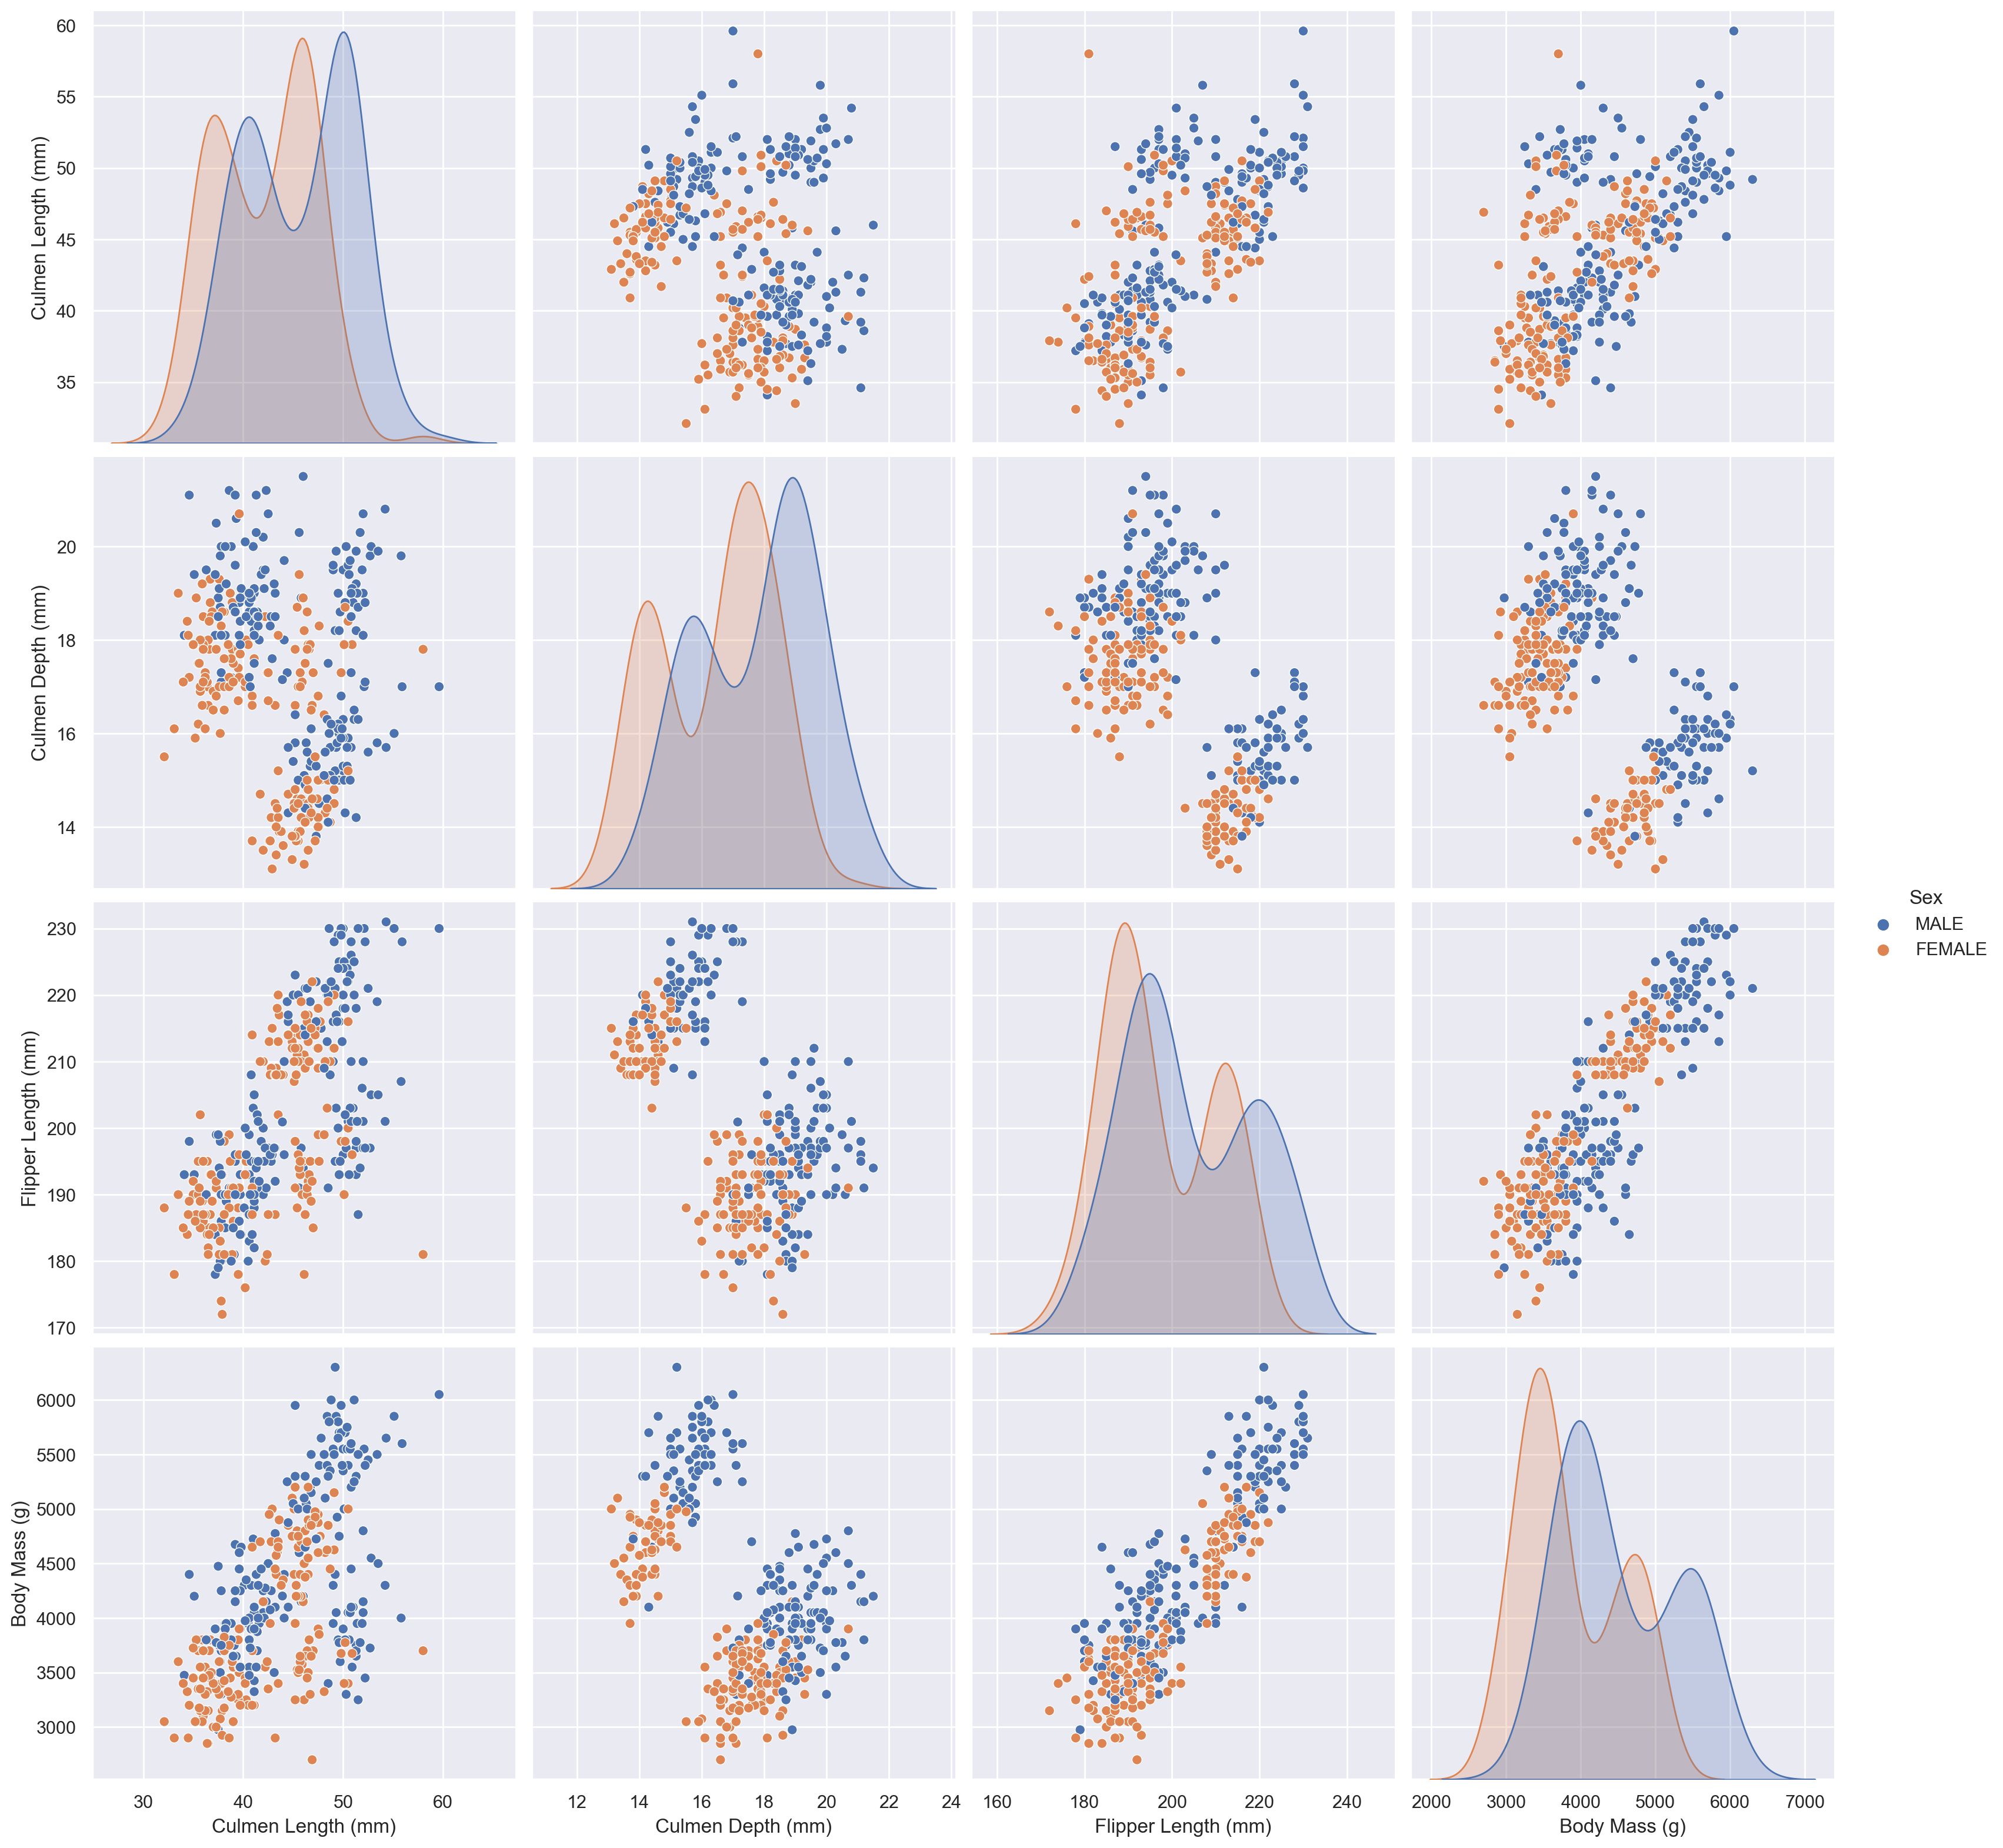

In [486]:
sns.pairplot(df,hue='Sex',height=4)
plt.show()

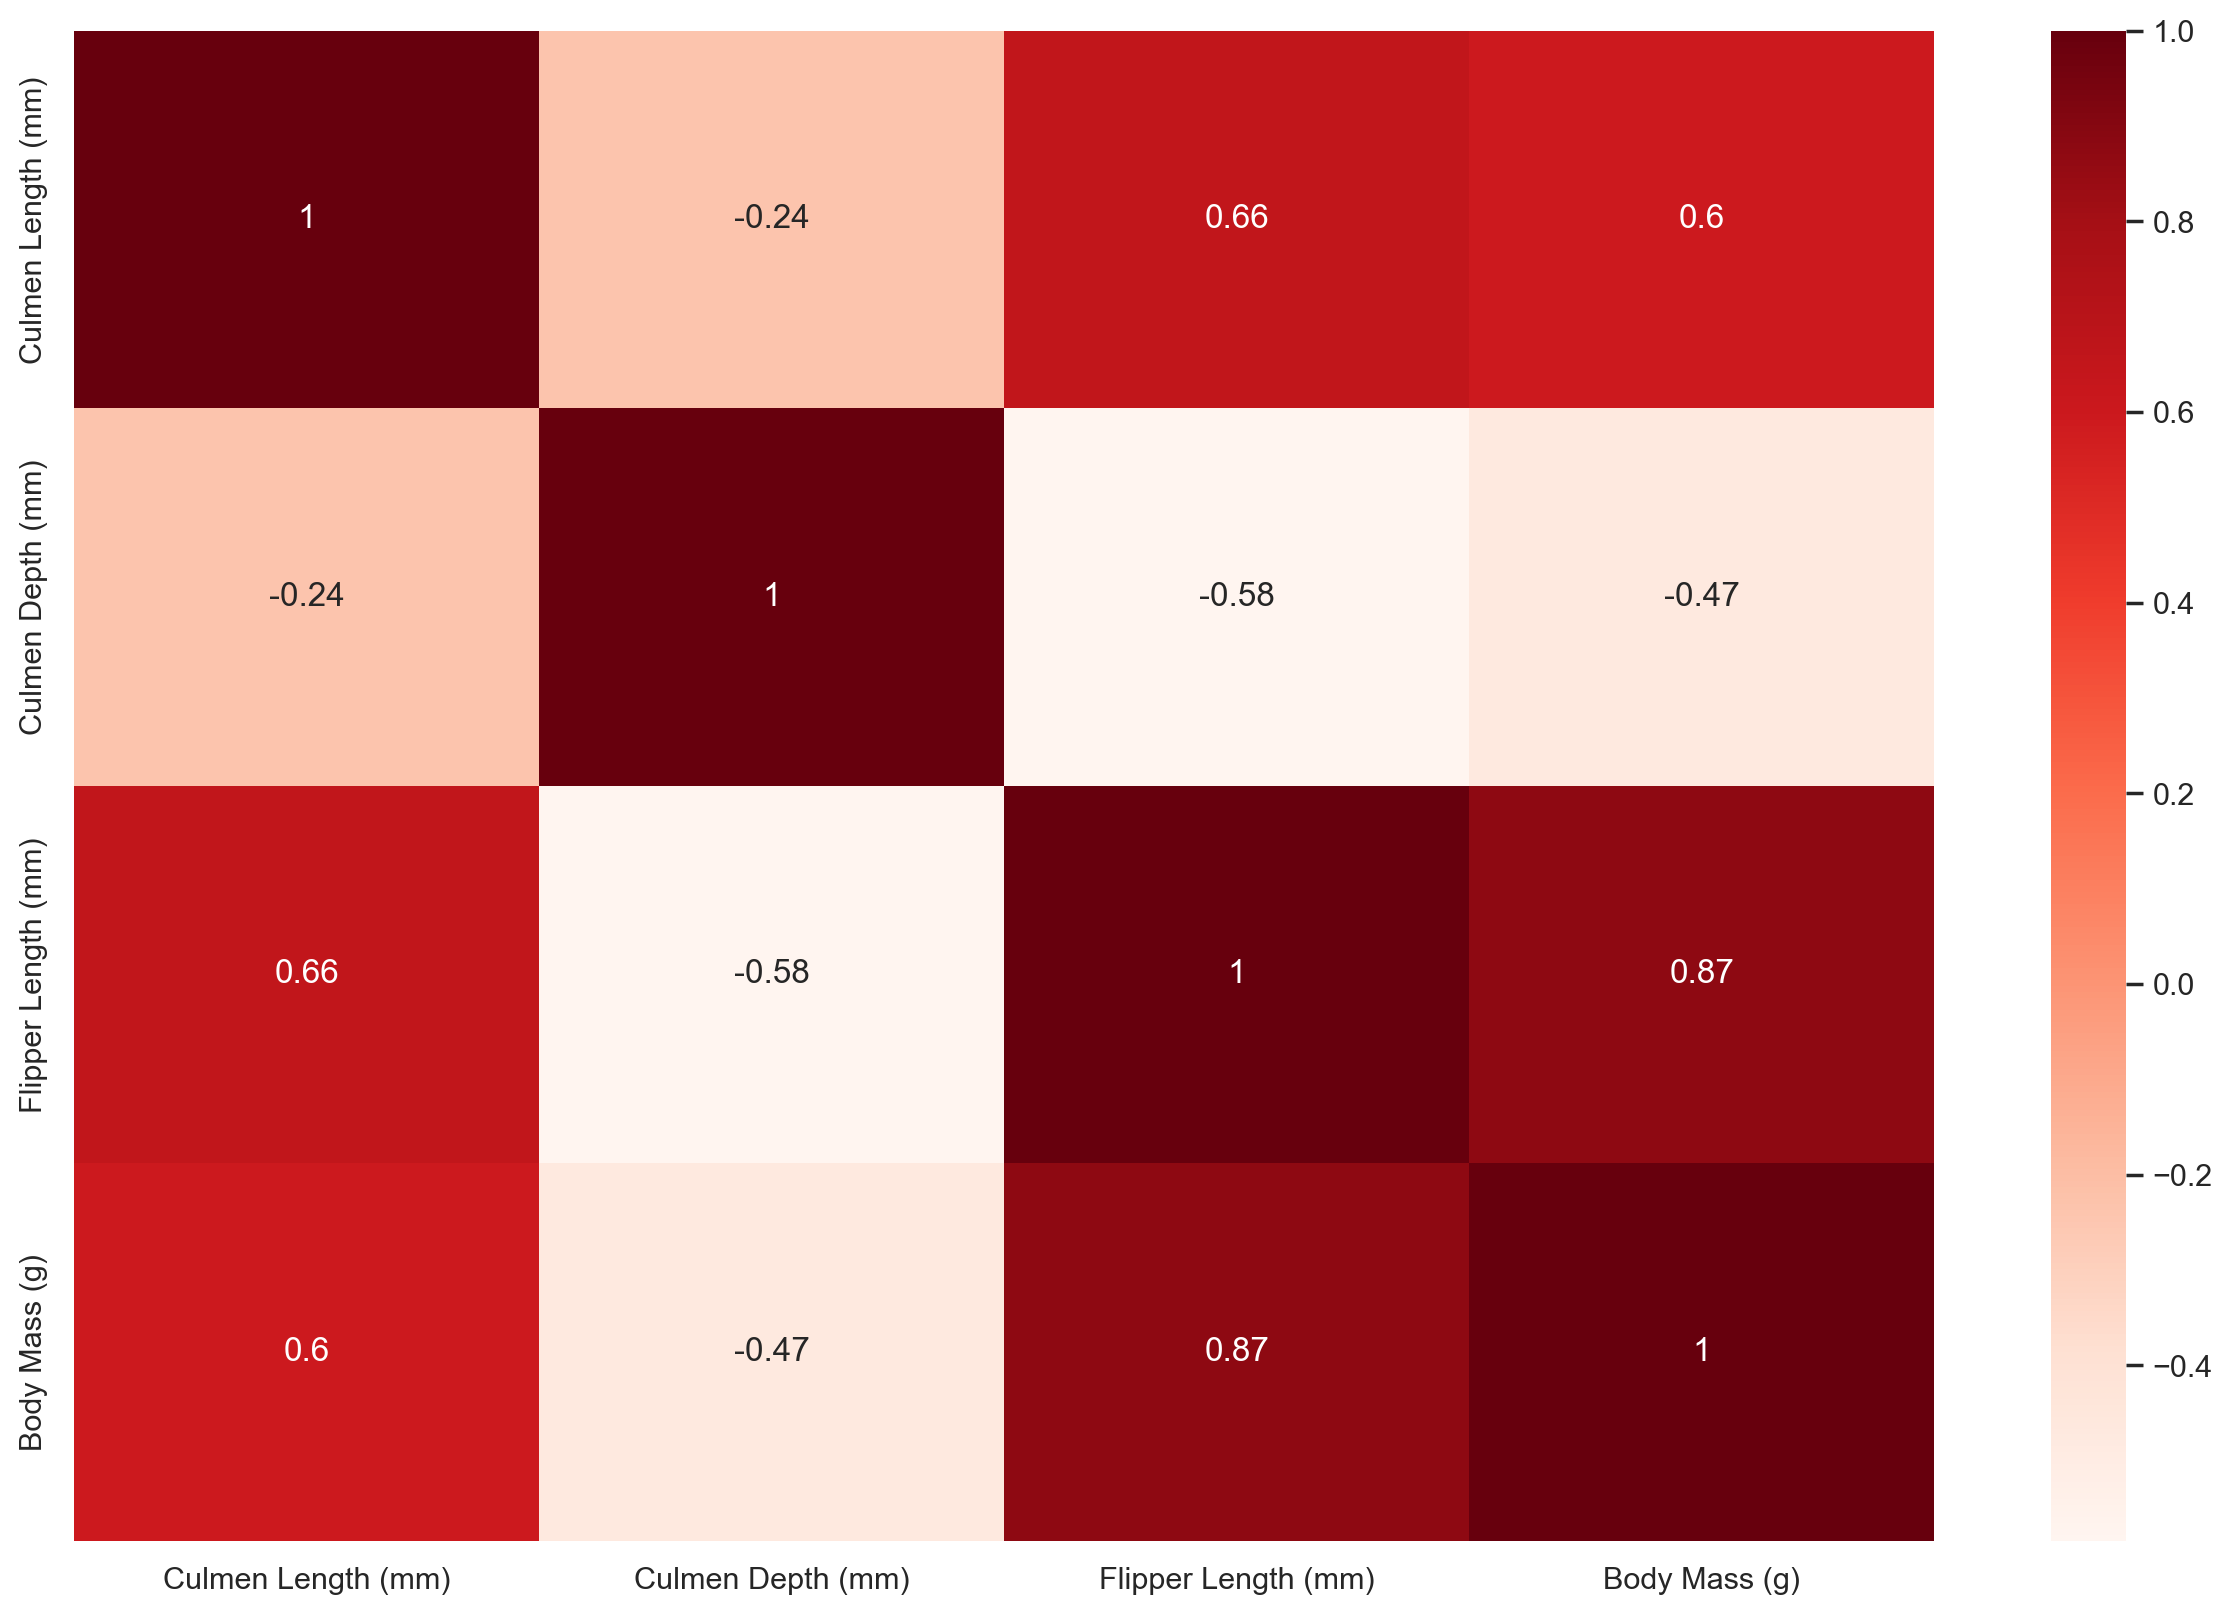

In [488]:
corr=df.corr()
sns.heatmap(corr, cmap="Reds",annot=True)
plt.show()